## Data Exploration

In [ ]:
!unzip /content/prsa_data.zip

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import torch
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import torch.utils.data as data
import torch
from torch.nn import LSTM, Linear
from sklearn.metrics import r2_score, mean_squared_error
import glob
import time
from tqdm import tqdm

%matplotlib inline

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

if "beijing+multi+site+air+quality+data.zip" not in os.listdir() and "PRSA_Data_20130301-20170228" not in os.listdir():
  !wget https://archive.ics.uci.edu/static/public/501/beijing+multi+site+air+quality+data.zip
  !unzip /content/beijing+multi+site+air+quality+data.zip
  !unzip /content/PRSA2017_Data_20130301-20170228.zip

In [ ]:
pm_data = pd.read_csv("/content/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
pm_data.dropna(inplace=True)
print(len(pm_data))
pm_data.head()

31815


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


<Axes: >

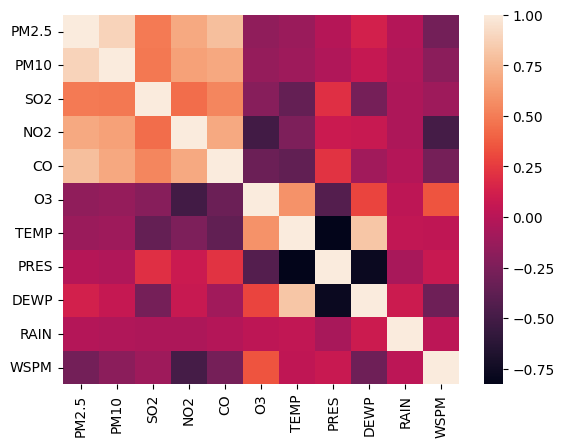

In [ ]:
corr = pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).select_dtypes('number').corr()
sns.heatmap(corr)

In [ ]:
pm_data.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM'],
      dtype='object')

/content/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
             PM2.5          PM10           SO2           NO2            CO  \
count  31815.00000  31815.000000  31815.000000  31815.000000  31815.000000   
mean      81.86363    109.120685     17.167205     58.976332   1256.574729   
std       80.44949     93.718017     22.760801     37.061384   1223.301208   
min        3.00000      2.000000      0.571200      2.000000    100.000000   
25%       22.00000     37.000000      3.000000     30.000000    500.000000   
50%       58.00000     86.000000      8.000000     53.000000    800.000000   
75%      114.00000    154.000000     21.000000     82.000000   1500.000000   
max      713.00000    948.000000    229.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  31815.000000  31815.000000  31815.000000  31815.000000  31815.000000   
mean      56.240938     13.775611   1011.800385      3.24

{'whiskers': [<matplotlib.lines.Line2D at 0x79845c69f4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79845c69fa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x79845c69f250>,
 'medians': [<matplotlib.lines.Line2D at 0x79845c69ff70>,
 'fliers': [<matplotlib.lines.Line2D at 0x79845ad20250>,
 'means': []}

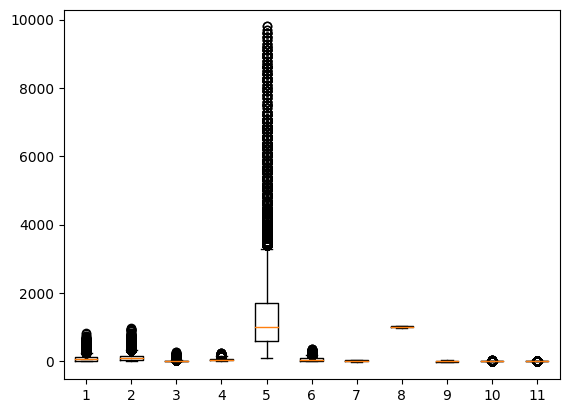

In [ ]:
all_csv_files = glob.glob("/content/PRSA_Data_20130301-20170228/*.csv")
for station_num, filename in enumerate(sorted(all_csv_files)):
    pm_data =pd.read_csv(filename).dropna().drop(["No", "year", "month", "day", "hour", "station"], axis=1).select_dtypes("number")
    print(filename)
    print(pm_data.describe())

In [ ]:
# citation for why scale the data?
scaler = MinMaxScaler()
scaler.fit(pm_data.select_dtypes("number"))
print(scaler.data_max_)
pm_data_scaled = scaler.transform(pm_data)
# pm_data_scaled_test = scaler.transform(pm_data.iloc[-8000:])
# pm_data_scaled_train = scaler.transform(pm_data.iloc[:-8000])
# print(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).select_dtypes("number").columns)
# pm_data

[ 823.   961.   273.   241.  9800.   358.    40.6 1042.    28.5   46.4
   13.2]


TypeError: unsupported operand type(s) for -: 'range' and 'float'

In [ ]:
filters = [0,2,3,5,-1]
cols = np.take(pm_data.columns,[0,2,3,5,-1])

/content/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv
/content/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv
/content/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv
/content/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv
/content/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv


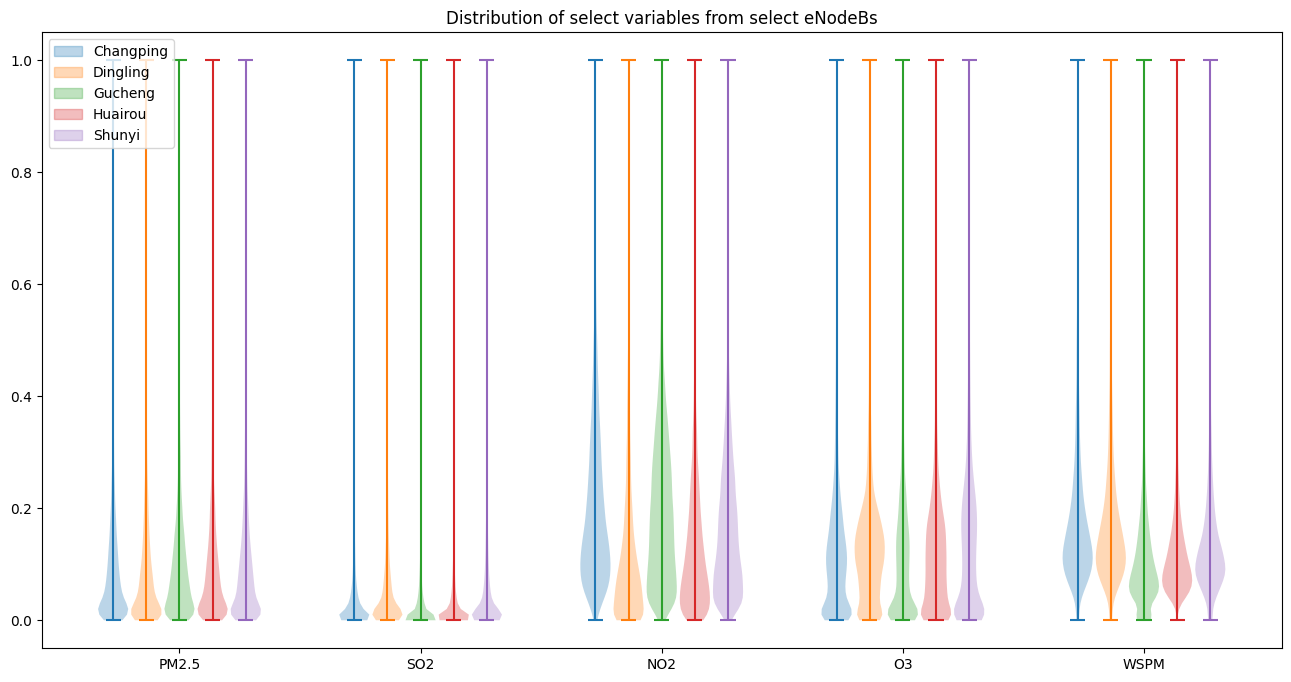

In [ ]:
# fig, axs = plt.subplot(len(cols))
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

all_csv_files = np.take(sorted(glob.glob("/content/PRSA_Data_20130301-20170228/*.csv")), [1,2,5,6,8])
plt.figure(figsize=(16,8))

for station_num, filename in enumerate(sorted(all_csv_files)):
  pm_data = pd.read_csv(filename)
  station_name = pm_data.loc[0, "station"]
  pm_data = pm_data.dropna().drop(["No", "year", "month", "day", "hour", "station"], axis=1).select_dtypes("number").loc[:,cols]
  print(filename)
  scaler = MinMaxScaler()
  scaler.fit(pm_data)
  # print(scaler.data_max_)
  pm_data_scaled = scaler.transform(pm_data)

  # for x in range(len(cols)):
  #   axs[x].boxplot(pm_data_scaled, whis=(0.01, 99.99), positions=[x + 0.08*station_num for x in range(len(cols))], widths=0.08)
  add_label(plt.violinplot(pm_data_scaled, positions=[8*x + 1.1*station_num for x in range(len(cols))], widths=1), station_name)
plt.xticks(ticks=[8*x + 1.1*2 for x in range(len(cols))], labels=cols)
plt.legend(*zip(*labels), loc=2)
plt.title("Distribution of select variables from select eNodeBs")
plt.show()
# plt.boxplot(pm_data_scaled, whis=(0.01, 99.99))

Text(0.5, 1.0, 'Data per eNodeB')

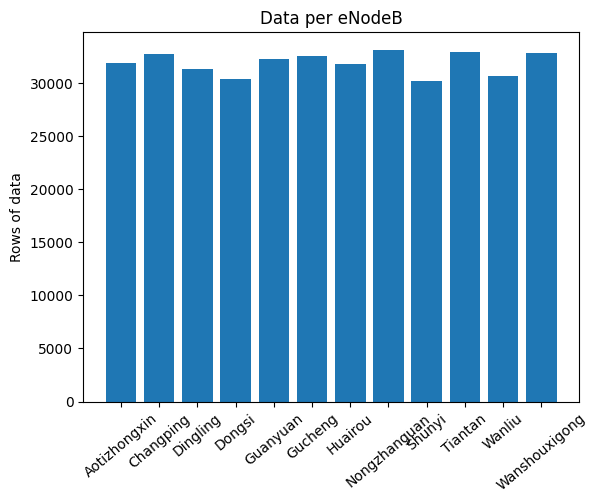

In [ ]:
# all_csv_files = sorted(glob.glob("/content/PRSA_Data_20130301-20170228/*.csv"))
# total_data_amts = []
# station_names = []
# for station_num, filename in enumerate(sorted(all_csv_files)):
#   pmd = pd.read_csv(filename).dropna()
#   station_names.append(pmd.loc[:, "station"].iloc[0])
#   print(filename)
#   total_data_amts.append(len(pmd))
#   print(total_data_amts[-1])
plt.bar(range(station_num+1), total_data_amts)
plt.ylabel("Rows of data")
plt.xticks(range(station_num+1), labels=station_names, rotation=40)
plt.title("Data per eNodeB")

In [ ]:
print("train", len(pm_data_scaled_train), "test", len(pm_data_scaled_test))

train 23815 test 8000


In [60]:
# window data for analysis (5 hours arbitrarily)
batch_size = 64
def create_dataset(pm_data_scaled, do_batch=True, split="train"):
  previous_pm, current_pm = [], []

  window_length = 12
  forward_look = 0
  for i in range(window_length, len(pm_data_scaled)-window_length):
    # current PM2.5, all variables up to current time
    previous_pm.append(pm_data_scaled[i-window_length:i])
    current_pm.append(pm_data_scaled[i+forward_look, 0])

  if do_batch: # to shuffle batch order but not sequence order
    output_x, output_y = [], []
    for i in range(0, len(current_pm), batch_size):
      if len(previous_pm[i:i+batch_size]) != batch_size and len(output_x) != 0:
        break
      output_x.append(np.stack(previous_pm[i:i+batch_size], axis=0))
      output_y.append(np.stack(current_pm[i:i+batch_size], axis=0))
    return torch.from_numpy(np.array(output_x)).float(), torch.from_numpy(np.array(output_y)).float()

  else: # for FL client case
    return torch.from_numpy(np.array(previous_pm)).float(), torch.from_numpy(np.array(current_pm)).float()

In [ ]:
# yes shuffle => not tracking hidden states (clearing after each mini-batch)
NUM_CLIENTS = 10
def create_federated_dataset(date_cutoff=None, station_nums=None): # date_cutoff is a dict of {unit: [num,num,...num]}
  global NUM_CLIENTS
  all_csv_files = sorted(glob.glob("/content/PRSA_Data_20130301-20170228/*.csv"))
  NUM_CLIENTS = len(all_csv_files)

  trainloaders, valloaders, testloader = [],[],[]
  X_val, y_val = [], []
  if not station_nums:
    station_nums = range(NUM_CLIENTS)
  for station_num in station_nums:
    filename = all_csv_files[station_num]
    pm_data = pd.read_csv(filename).dropna()

    if date_cutoff:
      pm_data = pm_data[(pm_data["year"].isin(date_cutoff["year"])) & (pm_data["month"].isin(date_cutoff["month"]))]

    if len(pm_data) <= 0:
      return trainloaders, valloaders, testloader
    print()
    print(pm_data.loc[:,"station"].iloc[0], len(pm_data))

    dset_len = len(pm_data)
    scaler = MinMaxScaler()
    scaler.fit(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).select_dtypes("number"))
    pm_data_scaled_test = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[-int(dset_len*0.2):-int(dset_len*0.15)].select_dtypes("number"))
    pm_data_scaled_train = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[:-int(dset_len*0.2)].select_dtypes("number"))
    pm_data_scaled_val = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[-int(dset_len*0.15):].select_dtypes("number"))
    # normalize dataframe
    # create dataset
    X_train, y_train = create_dataset(pm_data_scaled_train, True, "train")
    X_test, y_test = create_dataset(pm_data_scaled_test, True, "val")
    x_v, y_v = create_dataset(pm_data_scaled_val, True, "test")
    X_val += x_v
    y_val += y_v
    trainloaders.append(torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), shuffle=True, batch_size=1, drop_last=False))
    valloaders.append(torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test, y_test), shuffle=True, batch_size=1, drop_last=False))

  testloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.from_numpy(np.array(X_val)), torch.from_numpy(np.array(y_val))), shuffle=False, batch_size=1, drop_last = False)
  return trainloaders, valloaders, testloader
# create_federated_dataset(date_cutoff={"year":[2013], "month":[1,2,3]},station_nums=[0])

### Cloud-based training with individual stations
Want to show that federated learning is a bit better than combining all the data for global training

In [29]:
class PMModel(torch.nn.Module):
  def __init__(self, num_nodes=4):
    super().__init__()
    print(f"This model has 1 LSTM layer with {num_nodes} hidden nodes.")
    self.lstm = LSTM(input_size=11, hidden_size=num_nodes, num_layers=2, batch_first=True)
    self.linear = Linear(num_nodes, 1)

  def forward(self, x):
    x, _ = self.lstm(x)
    x = torch.nn.functional.dropout(x, p=0.1)
    x = self.linear(x)
    return x

In [82]:
from IPython.display import clear_output

In [ ]:
DEVICE="cpu"
for station_num in range(NUM_CLIENTS):
  model = PMModel(num_nodes=8).to(DEVICE)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
  criterion = torch.nn.MSELoss()
  n_epochs = 5
  n_rounds = 20
  predictions = []
  ground_truth = []
  losses = []
  val_losses = []

  avg_test_rmse = 0
  lowest_test_rmse = 10000
  val_loss = lowest_test_rmse
  decreasing_count = 0

  station_nums = [station_num]
  current_year = 2012
  current_month = 0
  months = 3
  total_data_passed = []

  for round in range(n_rounds): # moving time frames
    print("Round", round)
    if current_month == 0:
      current_year += 1
    date_cutoff = {"year":[current_year], "month":[current_month+m for m in range(1, months+1)]}
    print(date_cutoff)
    current_month = (current_month+months) % 12

    prog_bar = tqdm(range(n_epochs))
    for epoch in prog_bar: # iterations within a time frame
        model.train()
        total_loss = 0
        decreasing_rmse_counter = 0
        train_loader, val_loader, test_loader = create_federated_dataset(date_cutoff=date_cutoff,station_nums=station_nums)
        if len(train_loader) <= 0:
          print("no data")
          continue
        if len(train_loader[0]) <= 0:
          print("no data!")
          continue
        total_data_passed.append(len(train_loader[0]))
        for X_batch, y_batch in train_loader[0]:
            X_batch = X_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            if len(X_batch.shape) > 3:
              X_batch = X_batch[0]
              y_batch = y_batch[0]
            y_pred = model(X_batch)
            loss = criterion(y_pred[:, -1,0], y_batch)
            prog_bar.set_description(f"Epoch{epoch}: train loss = {loss},  val loss = {val_loss}")
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.detach().cpu())
        X_val, y_val = next(iter(val_loader[0]))
        if len(X_val.shape) > 3:
          X_val = X_val[0]
          y_val = y_val[0]
        y_pred = model(X_val.to(DEVICE))
        val_loss = criterion(y_pred[:, -1,0], y_val.to(DEVICE))
        val_losses.append(val_loss.detach().cpu())
        prog_bar.set_description(f"Epoch{epoch}: train loss = {loss}, val loss = {val_loss}")
        if val_loss > lowest_test_rmse:
          decreasing_count += 1
        else:
          decreasing_count = 0
          lowest_test_rmse = min(val_loss, lowest_test_rmse)
        # if decreasing_count >= 3:
        #   print("Early stop")
        #   break
        # Validation
        if epoch % 5 != 0:
            continue
        model.eval()
        with torch.no_grad():
            r2 = 0
            avg_test_rmse = 0
            for X_batch, y_batch in test_loader:
                X_batch = X_batch.to(DEVICE)
                if len(X_batch.shape) > 3:
                  X_batch = X_batch[0]
                  y_batch = y_batch[0]
                y_pred = model(X_batch)
                # print(y_pred[:, -1,0].shape,  y_batch.shape)
                test_rmse = criterion(y_pred[:, -1,0], y_batch.to(DEVICE)).sqrt()
                predictions.append(y_pred[:, -1,0].detach().cpu())
                ground_truth.append(y_batch)
                avg_test_rmse += test_rmse
            if len(predictions) > 0 and len(ground_truth) > 0:
              r2 = r2_score(np.concatenate(predictions).ravel(), np.concatenate(ground_truth).ravel())
            # prog_bar.set_description("Epoch %d: train RMSE %.4f, r2 %.4f" % (epoch, test_rmse))
            avg_test_rmse = avg_test_rmse / len(train_loader)
            # r2 = r2_score(predictions, ground_truth)
            print(f"Epoch {epoch}: Test rmse {avg_test_rmse}, r2 {r2}")
  plt.plot(total_data_passed)
  plt.pause(0.1)
  plt.plot(losses)
  plt.pause(0.1)
  plt.plot(val_losses)
  plt.pause(0.1)
  plt.plot()
  plt.plot(np.concatenate(predictions).ravel())
  plt.plot(np.concatenate(ground_truth).ravel())
  plt.pause(0.1)

  np.save(f"/content/{station_num}_local.npy", {
      "val_losses": val_losses,
      "losses": losses,
      "data_volume": total_data_passed
  })
  torch.save(model.state_dict(), f"/content/{station_num}_local.pth")
  clear_output()

In [ ]:
# !mv /content/*_local.npy /content/local_shuffled_dropped
# !mv /content/*_local.pth /content/local_shuffled_dropped
# !zip -r local_shuffled_dropped.zip /content/local_shuffled_dropped

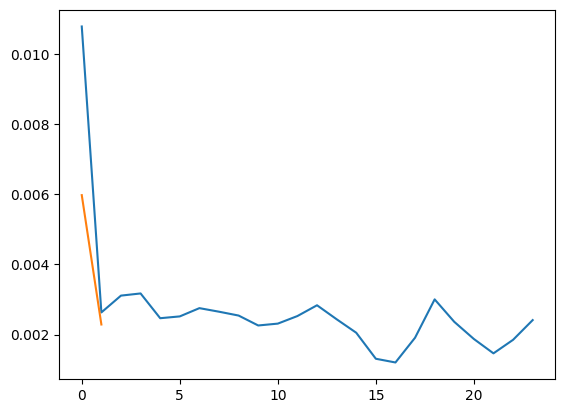

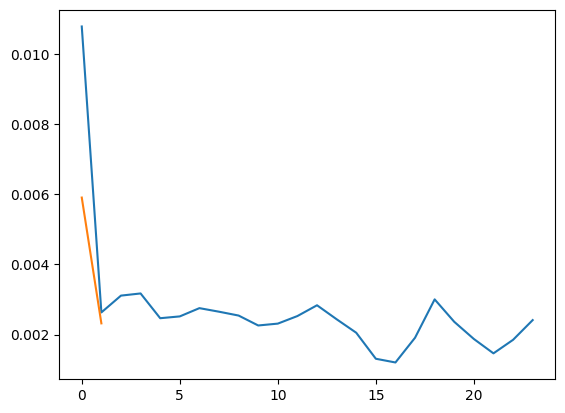

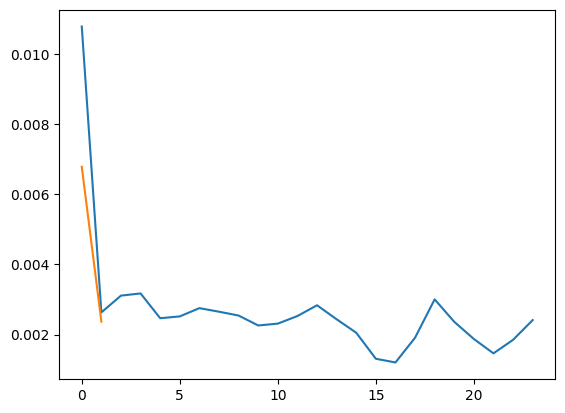

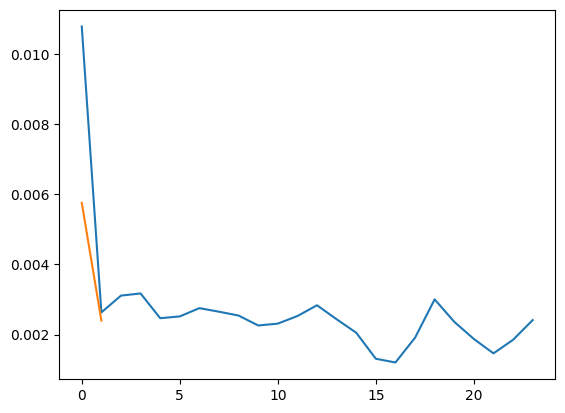

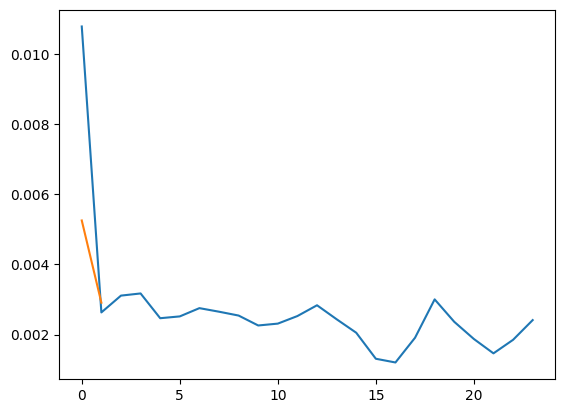

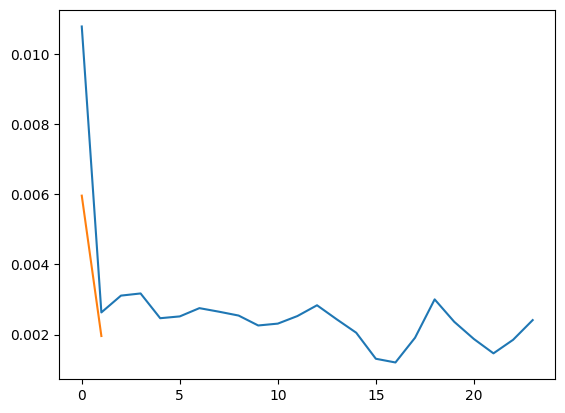

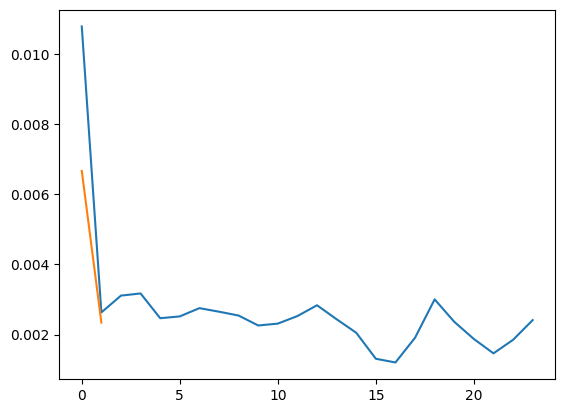

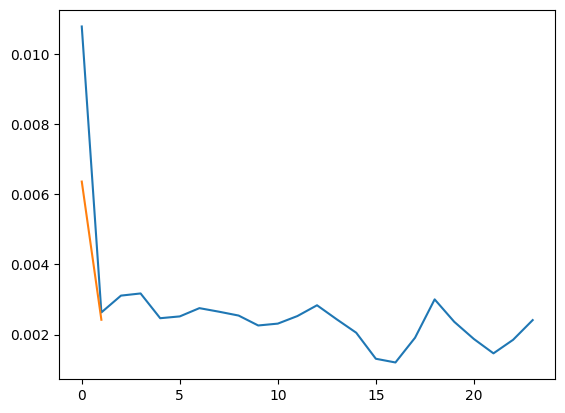

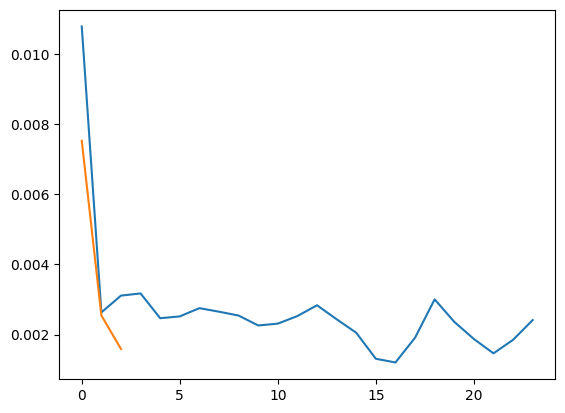

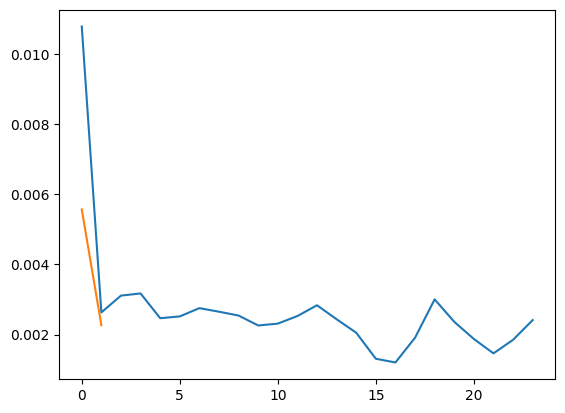

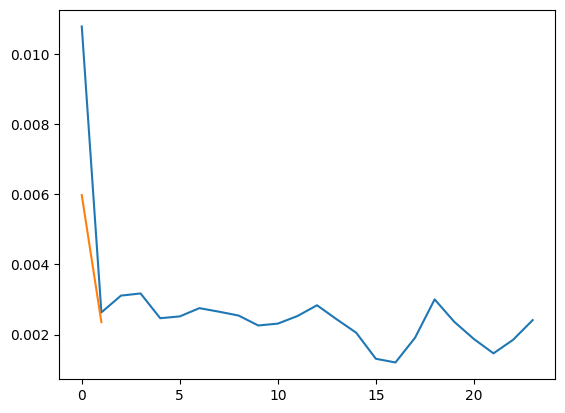

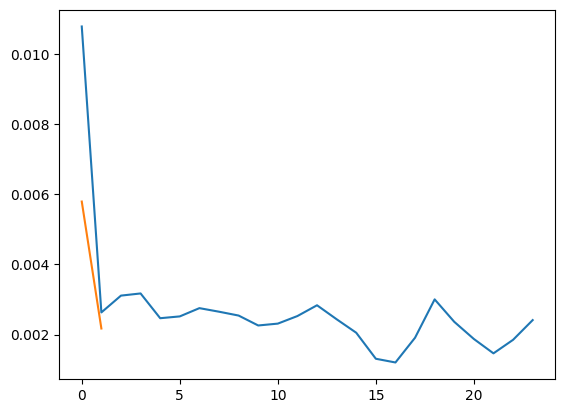

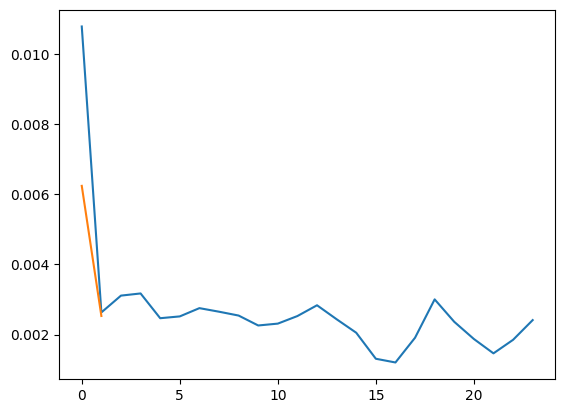

In [ ]:
temp_files = glob.glob("/content/local_shuffled_dropped/*.npy")

for f in temp_files:
  data_obj = np.load(f, allow_pickle=True)[()]
  # plt.plot(data_obj["data_volume"])
  # plt.pause(0.1)
  # plt.plot(data_obj["losses"])
  # plt.plot(losses)
  loss_summary_1 = []
  # loss_summary_2 = []
  for i in range(0, len(losses), 1000):
    loss_summary_1.append(np.mean(losses[i:i+1000]))
    # loss_summary_2.append(np.mean(data_obj["losses"][i:i+1000]))
  plt.plot(loss_summary_1)
  # plt.plot(loss_summary_2)
  plt.pause(0.1)
  # plt.plot(data_obj["val_losses"])
  # plt.pause(0.1)

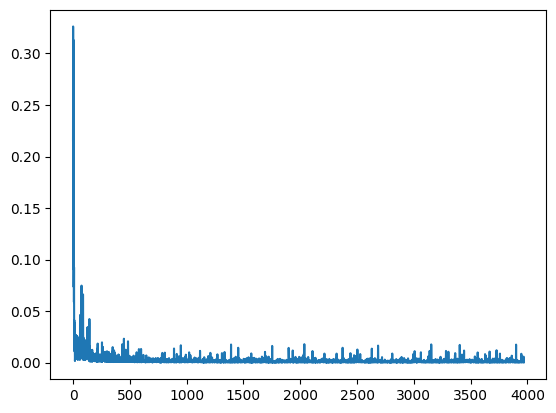

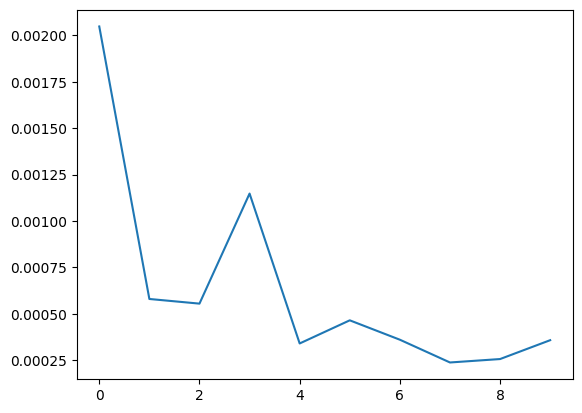

In [ ]:
plt.plot(losses)
plt.pause(0.1)
plt.plot(val_losses)

## Data Augmentation
VAE to add a few dozen IoT streams per station

In [ ]:
def create_data_aug_dataset():
  global NUM_CLIENTS
  all_csv_files = glob.glob("/content/PRSA_Data_20130301-20170228/*.csv")
  NUM_CLIENTS = len(all_csv_files)

  trainloaders, valloaders, testloader = [],[],[]
  X_val, y_val = [], []
  for filename in sorted(all_csv_files):
    pm_data = pd.read_csv(filename).dropna()
    print(pm_data.loc[:,"station"].iloc[0], len(pm_data))
    scaler = MinMaxScaler()
    scaler.fit(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).select_dtypes("number"))
    pm_data_scaled_test = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[-8000:-500].select_dtypes("number"))
    pm_data_scaled_train = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[:-8000].select_dtypes("number"))
    pm_data_scaled_val = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[-500:].select_dtypes("number"))
    # normalize dataframe
    # create dataset
    # X_train, y_train = create_dataset(pm_data_scaled_train, False)
    # X_test, y_test = create_dataset(pm_data_scaled_test, False)
    # x_v, y_v = create_dataset(pm_data_scaled_val, False)
    # X_val += x_v
    # y_val += y_v
    trainloaders.append(torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.tensor(pm_data_scaled_train).float()), shuffle=True, batch_size=batch_size, drop_last=True))
    valloaders.append(torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.tensor(pm_data_scaled_test).float()), shuffle=True, batch_size=batch_size, drop_last=False))

  testloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.tensor(pm_data_scaled_val).float()), shuffle=False, batch_size=batch_size, drop_last = False)
  return trainloaders, valloaders, testloader

# trainloaders, valloaders, testloader = create_data_aug_dataset()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

class VAE(nn.Module):
    def __init__(self, input_shape, H=50, H2=12, latent_dim=3):

        # Encoder
        super(VAE, self).__init__()
        self.linear1 = nn.Linear(input_shape, H)
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2 = nn.Linear(H, H2)
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)

        # Latent vectors mu and sigma
        self.fc1 = nn.Linear(H2, latent_dim)
        self.bn1 = nn.BatchNorm1d(num_features=latent_dim)
        self.fc21 = nn.Linear(latent_dim, latent_dim)
        self.fc22 = nn.Linear(latent_dim, latent_dim)

        # Sampling vector
        self.fc3 = nn.Linear(latent_dim, latent_dim)
        self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)
        self.fc_bn4 = nn.BatchNorm1d(H2)

        # Decoder
        self.linear3 = nn.Linear(H2, H)
        self.lin_bn3 = nn.BatchNorm1d(num_features=H)
        self.linear4 = nn.Linear(H, input_shape)
        self.lin_bn4 = nn.BatchNorm1d(num_features=input_shape)

        self.relu = nn.ReLU()

    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))
        fc1 = F.relu(self.bn1(self.fc1(lin2)))

        r1 = self.fc21(fc1)
        r2 = self.fc22(fc1)

        return r1, r2

    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        fc3 = self.relu(self.fc_bn3(self.fc3(z)))
        fc4 = self.relu(self.fc_bn4(self.fc4(fc3)))

        lin3 = self.relu(self.lin_bn3(self.linear3(fc4)))
        lin4 = self.lin_bn4(self.linear4(lin3))
        return lin4


    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")

    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.05 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

In [ ]:
device = "cuda"
D_in = 11
H = 24
H2 = 24

loss_custom = customLoss()
epochs = 25
log_interval = 2
val_losses = []
train_losses = []
test_losses = []

In [ ]:
def train(epoch, trainloader):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(trainloader):
        data = data[0].to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_custom(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    return train_loss / len(trainloader.dataset)
    # if epoch % log_interval == 0:
    #     print('====> Epoch: {} Average training loss: {:.4f}'.format(
    #         epoch, train_loss / len(trainloader.dataset)))
    #     train_losses.append(train_loss / len(trainloader.dataset))

def test(epoch, testloader):
    model.eval()
    with torch.no_grad():
        test_loss = 0
        for batch_idx, data in enumerate(testloader):
            data = data[0].to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = loss_custom(recon_batch, data, mu, logvar)
            test_loss += loss.item()
        return test_loss / len(testloader.dataset)
        # if epoch % log_interval == 0:
        #     print('====> Epoch: {} Average test loss: {:.4f}'.format(
        #         epoch, test_loss / len(testloader.dataset)))
        # test_losses.append(test_loss / len(testloader.dataset))

In [ ]:
def get_model_path(station_num):
  return sorted(glob.glob("/content/PRSA_Data_20130301-20170228/*.csv"))[station_num][:-22] + ".pth"

In [ ]:
from tqdm import tqdm
station_num = 0
all_csv_files = sorted(glob.glob("/content/PRSA_Data_20130301-20170228/*.csv"))

for station_num in range(NUM_CLIENTS):
  model = VAE(D_in, H, H2).to(device)
  optimizer = optim.Adam(model.parameters(), lr=1e-3)
  pbar = tqdm(range(1, epochs + 1))
  for epoch in pbar:
    tr_loss = train(epoch, trainloaders[station_num])
    te_loss = test(epoch, valloaders[station_num])
    pbar.set_postfix({"train loss": tr_loss, "test loss": te_loss})
  do_save = input("Save?")
  if do_save == "y":
    print("SAVING")
    torch.save(model.state_dict(), all_csv_files[station_num][:-22] + ".pth")

100%|██████████| 25/25 [00:16<00:00,  1.48it/s, train loss=0.192, test loss=0.151]


Save?y
SAVING


100%|██████████| 25/25 [00:14<00:00,  1.72it/s, train loss=0.193, test loss=0.138]


Save?y
SAVING


100%|██████████| 25/25 [00:13<00:00,  1.80it/s, train loss=0.188, test loss=0.134]


Save?y
SAVING


100%|██████████| 25/25 [00:13<00:00,  1.83it/s, train loss=0.185, test loss=0.148]


Save?y
SAVING


100%|██████████| 25/25 [00:14<00:00,  1.74it/s, train loss=0.195, test loss=0.136]


Save?y
SAVING


100%|██████████| 25/25 [00:14<00:00,  1.73it/s, train loss=0.179, test loss=0.144]


Save?y
SAVING


100%|██████████| 25/25 [00:14<00:00,  1.73it/s, train loss=0.17, test loss=0.131]


Save?y
SAVING


100%|██████████| 25/25 [00:14<00:00,  1.67it/s, train loss=0.206, test loss=0.141]


Save?y
SAVING


100%|██████████| 25/25 [00:13<00:00,  1.82it/s, train loss=0.197, test loss=0.153]


Save?y
SAVING


100%|██████████| 25/25 [00:14<00:00,  1.73it/s, train loss=0.186, test loss=0.129]


Save?y
SAVING


100%|██████████| 25/25 [00:13<00:00,  1.86it/s, train loss=0.208, test loss=0.144]


Save?y
SAVING


100%|██████████| 25/25 [00:14<00:00,  1.72it/s, train loss=0.195, test loss=0.142]


Save?y
SAVING


In [ ]:
# check mean, stdev
with torch.no_grad():
  for batch_idx, data in enumerate(valloaders[station_num]):
    data = data[0].to(device)
    optimizer.zero_grad()
    recon_batch, mu, logvar = model(data)

    recon_row = recon_batch[0].cpu().numpy()
    real_row = data[0].cpu().numpy()
    print(mu.mean(axis=0), torch.exp(logvar/2).mean(axis=0))

In [ ]:
no_samples = 20
q = torch.distributions.Normal(mu.mean(axis=0), torch.exp(logvar/2).mean(axis=0))
z = q.rsample(sample_shape=torch.Size([no_samples]))

with torch.no_grad():
    pred = model.decode(z).cpu().numpy()

In [ ]:
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
recon_df = pd.DataFrame(recon_batch.cpu().numpy(), columns = columns)
real_df = pd.DataFrame(data.cpu().numpy(), columns = columns)

In [ ]:
recon_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,0.098577,0.112158,0.062314,0.202137,0.095088,0.120155,0.549922,0.447434,0.616421,0.001225,0.152411
1,0.105940,0.111419,0.049260,0.192197,0.085795,0.184212,0.687715,0.322721,0.770993,0.001237,0.139834
2,0.096263,0.110020,0.064530,0.198226,0.094831,0.117430,0.535221,0.459517,0.600701,0.001106,0.156171
3,0.106835,0.112266,0.047951,0.191359,0.084473,0.193003,0.699915,0.307160,0.786968,0.001153,0.136163
4,0.093045,0.106717,0.067435,0.193952,0.094661,0.112960,0.516248,0.475705,0.581014,0.000909,0.160688


In [ ]:
real_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,0.138028,0.236786,0.137587,0.250000,0.121212,0.034972,0.567190,0.388592,0.485893,0.0,0.080357
1,0.029577,0.033827,0.006255,0.184028,0.040404,0.016050,0.748691,0.265597,0.873041,0.0,0.169643
2,0.009859,0.025370,0.015010,0.069444,0.020202,0.143774,0.493892,0.404635,0.498433,0.0,0.178571
3,0.064789,0.070825,0.010633,0.090278,0.070707,0.290421,0.799302,0.226381,0.860502,0.0,0.107143
4,0.067606,0.104651,0.019388,0.149306,0.040404,0.051529,0.464223,0.438503,0.554859,0.0,0.062500


## Cloud-based training (Centralized)

In [ ]:
# X_train, y_train = create_dataset(pm_data_scaled_train)
# X_test, y_test = create_dataset(pm_data_scaled_test)
# print(X_train.shape, y_train.shape)

# batch_size = 1
# train_loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=False, batch_size=batch_size, drop_last=True)
# test_loader = data.DataLoader(data.TensorDataset(X_test, y_test), shuffle=False, batch_size=batch_size, drop_last=False)

torch.Size([23803, 6, 11]) torch.Size([23803])


In [ ]:
all_csv_files = glob.glob("/content/PRSA_Data_20130301-20170228/*.csv")
total_data = 0
for station_num, filename in enumerate(sorted(all_csv_files)):
    pm_data =!un pd.read_csv(filename).dropna()
    print(len(pm_data))
    total_data += len(pm_data)

In [ ]:
# total rows of data from VAIS paper / data i have access to
(0.2*10**6/5) / (total_data/12)

1.255992129115991

In [ ]:
# !zip -r /content/prsa_data.zip /content/PRSA_Data_20130301-20170228

In [58]:
# batch_size = 64
def create_unified_dataset(date_cutoff=None):
  all_csv_files = glob.glob("/content/PRSA_Data_20130301-20170228/*.csv")

  trainloaders, valloaders, testloader = [],[],[]
  X_val, y_val = [], []
  for station_num, filename in enumerate(sorted(all_csv_files)):
    pm_data = pd.read_csv(filename).dropna()
    if date_cutoff:
      pm_data = pm_data[(pm_data["year"].isin(date_cutoff["year"])) & (pm_data["month"].isin(date_cutoff["month"]))]

    dset_len = len(pm_data)
    print(pm_data.loc[:,"station"].iloc[0], dset_len)
    scaler = MinMaxScaler()

    # normalize data
    scaler.fit(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).select_dtypes("number"))
    pm_data_scaled_test = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[-int(dset_len*0.2):-int(dset_len*0.15)].select_dtypes("number"))
    pm_data_scaled_train = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[:-int(dset_len*0.2)].select_dtypes("number"))
    pm_data_scaled_val = scaler.transform(pm_data.drop(["No", "year", "month", "day", "hour", "station"], axis=1).iloc[-int(dset_len*0.15):].select_dtypes("number"))

    # # augment dataset
    # da_model = VAE(D_in, H, H2).to(device)
    # da_model.load_state_dict(torch.load(get_model_path(station_num)))
    # da_model.eval()

    # # data augmentation: total, end up with ~2x samples
    # num_samples = 256
    # concat_holder = []
    # for aug_idx in range(0, len(pm_data), num_samples):
    #   mu, logvar = da_model.encode(torch.tensor(pm_data_scaled_train[aug_idx:aug_idx+num_samples]).float().cuda())
    #   if mu.shape[0] and logvar.shape[0]:
    #     q = torch.distributions.Normal(mu.nanmean(axis=0), torch.exp(logvar/2).nanmean(axis=0))
    #     z = q.rsample(sample_shape=torch.Size([num_samples]))

    #     with torch.no_grad():
    #       pred = da_model.decode(z)
    #       concat_holder.append(pred)

    # concat_holder = torch.cat(concat_holder, axis=0).cpu()
    # print(concat_holder.shape)
    # pm_data_scaled_train = torch.cat([concat_holder, torch.tensor(pm_data_scaled_train)], axis=0)
    # print(pm_data_scaled_train.shape)

    # create dataset
    X_train, y_train = create_dataset(pm_data_scaled_train)
    X_test, y_test = create_dataset(pm_data_scaled_test)
    x_v, y_v = create_dataset(pm_data_scaled_val)
    X_val += x_v
    y_val += y_v
    trainloaders.append(torch.utils.data.TensorDataset(X_train, y_train))
    valloaders.append(torch.utils.data.TensorDataset(X_test, y_test))
  trainloader = torch.utils.data.DataLoader(torch.utils.data.ConcatDataset(trainloaders), shuffle=True, batch_size=1, drop_last=True)
  valloader = torch.utils.data.DataLoader(torch.utils.data.ConcatDataset(valloaders), shuffle=True, batch_size=1, drop_last=False)

  testloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.cat(X_val, axis=0), torch.cat(y_val, axis=0)), shuffle=True, batch_size=batch_size, drop_last = False)
  return trainloader, valloader, testloader

In [ ]:
model = PMModel(num_nodes=8).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.MSELoss()
n_epochs = 5
n_rounds = 20
predictions = []
ground_truth = []
losses = []
val_losses = []

avg_test_rmse = 0
lowest_test_rmse = 10000
val_loss = lowest_test_rmse
decreasing_count = 0

station_nums = [station_num]
current_year = 2012
current_month = 0
months = 3
total_data_passed = []

for round in range(n_rounds): # moving time frames
  print("Round", round)
  if current_month == 0:
    current_year += 1
  date_cutoff = {"year":[current_year], "month":[current_month+m for m in range(1, months+1)]}
  print(date_cutoff)
  current_month = (current_month+months) % 12

  prog_bar = tqdm(range(n_epochs))
  for epoch in prog_bar: # iterations within a time frame
      model.train()
      total_loss = 0
      decreasing_rmse_counter = 0
      train_loader, val_loader, test_loader = create_unified_dataset(date_cutoff=date_cutoff)
      if len(train_loader) <= 0:
        print("no data")
        continue
      total_data_passed.append(len(train_loader))
      for X_batch, y_batch in train_loader:
          X_batch = X_batch.cuda()
          y_batch = y_batch.cuda()
          if len(X_batch.shape) > 3:
            X_batch = X_batch[0]
            y_batch = y_batch[0]
          y_pred = model(X_batch)
          loss = criterion(y_pred[:, -1,0], y_batch)
          prog_bar.set_description(f"Epoch{epoch}: train loss = {loss},  val loss = {val_loss}")
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          losses.append(loss.detach().cpu())
      X_val, y_val = next(iter(val_loader))
      if len(X_val.shape) > 3:
        X_val = X_val[0]
        y_val = y_val[0]
      y_pred = model(X_val.cuda())
      val_loss = criterion(y_pred[:, -1,0], y_val.cuda())
      val_losses.append(val_loss.detach().cpu())
      prog_bar.set_description(f"Epoch{epoch}: train loss = {loss}, val loss = {val_loss}")
      if val_loss > lowest_test_rmse:
        decreasing_count += 1
      else:
        decreasing_count = 0
        lowest_test_rmse = min(val_loss, lowest_test_rmse)
      # if decreasing_count >= 3:
      #   print("Early stop")
      #   break
      # Validation
      if epoch % 5 != 0:
          continue
      model.eval()
      with torch.no_grad():
          r2 = 0
          avg_test_rmse = 0
          for X_batch, y_batch in test_loader:
              X_batch = X_batch.cuda()
              if len(X_batch.shape) > 3:
                X_batch = X_batch[0]
                y_batch = y_batch[0]
              y_pred = model(X_batch)
              # print(y_pred[:, -1,0].shape,  y_batch.shape)
              test_rmse = criterion(y_pred[:, -1,0], y_batch.cuda()).sqrt()
              predictions.append(y_pred[:, -1,0].detach().cpu())
              ground_truth.append(y_batch)
              avg_test_rmse += test_rmse
          if len(predictions) > 0 and len(ground_truth) > 0:
            r2 = r2_score(np.concatenate(predictions).ravel(), np.concatenate(ground_truth).ravel())
          # prog_bar.set_description("Epoch %d: train RMSE %.4f, r2 %.4f" % (epoch, test_rmse))
          avg_test_rmse = avg_test_rmse / len(train_loader)
          # r2 = r2_score(predictions, ground_truth)
          print(f"Epoch {epoch}: Test rmse {avg_test_rmse}, r2 {r2}")
clear_output()
plt.plot(total_data_passed)
plt.pause(0.1)
plt.plot(losses)
plt.pause(0.1)
plt.plot(val_losses)
plt.pause(0.1)
plt.plot()
plt.plot(np.concatenate(predictions).ravel())
plt.plot(np.concatenate(ground_truth).ravel())
plt.pause(0.1)

np.save(f"/content/cloud.npy", {
    "val_losses": val_losses,
    "losses": losses,
    "data_volume": total_data_passed
})
torch.save(model.state_dict(), f"/content/cloud.pth")

This model has 1 LSTM layer with 8 hidden nodes.
Round 0
{'year': [2013], 'month': [1, 2, 3]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 653
Changping 707
Dingling 663
Dongsi 614
Guanyuan 706
Gucheng 643
Huairou 641
Nongzhanguan 707
Shunyi 675
Tiantan 646
Wanliu 670


Epoch0: train loss = 0.38723960518836975,  val loss = 10000:   0%|          | 0/5 [00:00<?, ?it/s]

Wanshouxigong 702


Epoch0: train loss = 0.01969282329082489, val loss = 0.013293355703353882:  20%|██        | 1/5 [00:01<00:05,  1.41s/it]

Epoch 0: Test rmse 0.009770180098712444, r2 -0.2105451037449917
Aotizhongxin 653
Changping 707
Dingling 663
Dongsi 614
Guanyuan 706
Gucheng 643
Huairou 641
Nongzhanguan 707
Shunyi 675
Tiantan 646
Wanliu 670


Epoch1: train loss = 0.011768141761422157,  val loss = 0.013293355703353882:  20%|██        | 1/5 [00:02<00:05,  1.41s/it]

Wanshouxigong 702


Epoch1: train loss = 0.014133489690721035, val loss = 0.015712186694145203:  40%|████      | 2/5 [00:03<00:05,  1.73s/it]

Aotizhongxin 653
Changping 707
Dingling 663
Dongsi 614
Guanyuan 706
Gucheng 643
Huairou 641
Nongzhanguan 707
Shunyi 675
Tiantan 646
Wanliu 670


Epoch2: train loss = 0.012601038441061974,  val loss = 0.015712186694145203:  40%|████      | 2/5 [00:04<00:05,  1.73s/it]

Wanshouxigong 702


Epoch2: train loss = 0.004154747352004051, val loss = 0.033161696046590805:  60%|██████    | 3/5 [00:04<00:03,  1.59s/it]

Aotizhongxin 653
Changping 707
Dingling 663
Dongsi 614
Guanyuan 706
Gucheng 643
Huairou 641
Nongzhanguan 707
Shunyi 675
Tiantan 646


Epoch3: train loss = 0.008475231006741524,  val loss = 0.033161696046590805:  60%|██████    | 3/5 [00:05<00:03,  1.59s/it]

Wanliu 670
Wanshouxigong 702


Epoch3: train loss = 0.00761908246204257, val loss = 0.0012537961592897773:  80%|████████  | 4/5 [00:06<00:01,  1.47s/it]

Aotizhongxin 653
Changping 707
Dingling 663
Dongsi 614
Guanyuan 706
Gucheng 643
Huairou 641
Nongzhanguan 707
Shunyi 675
Tiantan 646


Epoch4: train loss = 0.008574668318033218,  val loss = 0.0012537961592897773:  80%|████████  | 4/5 [00:07<00:01,  1.47s/it]

Wanliu 670
Wanshouxigong 702


Epoch4: train loss = 0.003886958584189415, val loss = 0.01916671358048916: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


Round 1
{'year': [2013], 'month': [4, 5, 6]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 1765
Changping 1666
Dingling 1913
Dongsi 1577
Guanyuan 1781
Gucheng 1860
Huairou 1580
Nongzhanguan 1989
Shunyi 2006
Tiantan 2019
Wanliu 1836


Epoch0: train loss = 0.006742850877344608,  val loss = 0.01916671358048916:   0%|          | 0/5 [00:00<?, ?it/s]

Wanshouxigong 1979


Epoch0: train loss = 0.003358575515449047, val loss = 0.004381231963634491:  20%|██        | 1/5 [00:02<00:09,  2.29s/it]

Epoch 0: Test rmse 0.011160619556903839, r2 0.6529036784216551
Aotizhongxin 1765
Changping 1666
Dingling 1913
Dongsi 1577
Guanyuan 1781
Gucheng 1860
Huairou 1580
Nongzhanguan 1989
Shunyi 2006
Tiantan 2019
Wanliu 1836


Epoch1: train loss = 0.003988752607256174,  val loss = 0.004381231963634491:  20%|██        | 1/5 [00:03<00:09,  2.29s/it]

Wanshouxigong 1979


Epoch1: train loss = 0.00266687897965312, val loss = 0.0010223358403891325:  40%|████      | 2/5 [00:04<00:06,  2.28s/it]

Aotizhongxin 1765
Changping 1666
Dingling 1913
Dongsi 1577
Guanyuan 1781
Gucheng 1860
Huairou 1580
Nongzhanguan 1989
Shunyi 2006


Epoch2: train loss = 0.002554686274379492,  val loss = 0.0010223358403891325:  40%|████      | 2/5 [00:05<00:06,  2.28s/it] 

Tiantan 2019
Wanliu 1836
Wanshouxigong 1979


Epoch2: train loss = 0.0011264457134529948, val loss = 0.0024539099540561438:  60%|██████    | 3/5 [00:06<00:04,  2.33s/it]

Aotizhongxin 1765
Changping 1666
Dingling 1913
Dongsi 1577
Guanyuan 1781
Gucheng 1860
Huairou 1580
Nongzhanguan 1989
Shunyi 2006
Tiantan 2019


Epoch3: train loss = 0.006680736318230629,  val loss = 0.0024539099540561438:  60%|██████    | 3/5 [00:08<00:04,  2.33s/it]

Wanliu 1836
Wanshouxigong 1979


Epoch3: train loss = 0.0006341367843560874, val loss = 0.0019237103406339884:  80%|████████  | 4/5 [00:09<00:02,  2.54s/it]

Aotizhongxin 1765
Changping 1666
Dingling 1913
Dongsi 1577
Guanyuan 1781
Gucheng 1860
Huairou 1580
Nongzhanguan 1989
Shunyi 2006


Epoch4: train loss = 0.0007048519910313189,  val loss = 0.0019237103406339884:  80%|████████  | 4/5 [00:10<00:02,  2.54s/it]

Tiantan 2019
Wanliu 1836
Wanshouxigong 1979


Epoch4: train loss = 0.0018620056798681617, val loss = 0.002346460707485676: 100%|██████████| 5/5 [00:12<00:00,  2.42s/it]


Round 2
{'year': [2013], 'month': [7, 8, 9]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 1965
Changping 1919
Dingling 1981
Dongsi 1111
Guanyuan 2069
Gucheng 2055
Huairou 1889
Nongzhanguan 2116
Shunyi 1234
Tiantan 2104
Wanliu 2093


Epoch0: train loss = 0.0009984240168705583,  val loss = 0.002346460707485676:   0%|          | 0/5 [00:00<?, ?it/s]

Wanshouxigong 1872


Epoch0: train loss = 0.0020625926554203033, val loss = 0.0011693910928443074:  20%|██        | 1/5 [00:02<00:09,  2.32s/it]

Epoch 0: Test rmse 0.010007534176111221, r2 0.7928119828298344
Aotizhongxin 1965
Changping 1919
Dingling 1981
Dongsi 1111
Guanyuan 2069
Gucheng 2055
Huairou 1889
Nongzhanguan 2116
Shunyi 1234
Tiantan 2104
Wanliu 2093


Epoch1: train loss = 0.0006351430201902986,  val loss = 0.0011693910928443074:  20%|██        | 1/5 [00:03<00:09,  2.32s/it]

Wanshouxigong 1872


Epoch1: train loss = 0.002621058374643326, val loss = 0.0026889583095908165:  40%|████      | 2/5 [00:04<00:06,  2.31s/it]

Aotizhongxin 1965
Changping 1919
Dingling 1981
Dongsi 1111
Guanyuan 2069
Gucheng 2055
Huairou 1889
Nongzhanguan 2116
Shunyi 1234


Epoch2: train loss = 0.002258247695863247,  val loss = 0.0026889583095908165:  40%|████      | 2/5 [00:05<00:06,  2.31s/it]

Tiantan 2104
Wanliu 2093
Wanshouxigong 1872


Epoch2: train loss = 0.0005711597623303533, val loss = 0.001122125657275319:  60%|██████    | 3/5 [00:06<00:04,  2.33s/it]

Aotizhongxin 1965
Changping 1919
Dingling 1981
Dongsi 1111
Guanyuan 2069
Gucheng 2055
Huairou 1889
Nongzhanguan 2116
Shunyi 1234
Tiantan 2104


Epoch3: train loss = 0.004458406008780003,  val loss = 0.001122125657275319:  60%|██████    | 3/5 [00:08<00:04,  2.33s/it]

Wanliu 2093
Wanshouxigong 1872


Epoch3: train loss = 0.0019323467276990414, val loss = 0.0010998044162988663:  80%|████████  | 4/5 [00:09<00:02,  2.61s/it]

Aotizhongxin 1965
Changping 1919
Dingling 1981
Dongsi 1111
Guanyuan 2069
Gucheng 2055
Huairou 1889
Nongzhanguan 2116
Shunyi 1234


Epoch4: train loss = 0.0037546674720942974,  val loss = 0.0010998044162988663:  80%|████████  | 4/5 [00:10<00:02,  2.61s/it]

Tiantan 2104
Wanliu 2093
Wanshouxigong 1872


Epoch4: train loss = 0.003847641870379448, val loss = 0.0009513271506875753: 100%|██████████| 5/5 [00:12<00:00,  2.48s/it]


Round 3
{'year': [2013], 'month': [10, 11, 12]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 1615
Changping 1976
Dingling 1017
Dongsi 1272
Guanyuan 1195
Gucheng 1603
Huairou 2021
Nongzhanguan 1853
Shunyi 2074
Tiantan 1993
Wanliu 801


Epoch0: train loss = 0.0023559662513434887,  val loss = 0.0009513271506875753:   0%|          | 0/5 [00:00<?, ?it/s]

Wanshouxigong 1833


Epoch0: train loss = 0.0012264518300071359, val loss = 0.011920997872948647:  20%|██        | 1/5 [00:02<00:08,  2.12s/it]

Epoch 0: Test rmse 0.008993365801870823, r2 0.8311517036689271
Aotizhongxin 1615
Changping 1976
Dingling 1017
Dongsi 1272
Guanyuan 1195
Gucheng 1603
Huairou 2021
Nongzhanguan 1853
Shunyi 2074
Tiantan 1993
Wanliu 801


Epoch1: train loss = 0.0016213255003094673,  val loss = 0.011920997872948647:  20%|██        | 1/5 [00:03<00:08,  2.12s/it]

Wanshouxigong 1833


Epoch1: train loss = 0.009099530056118965, val loss = 0.01266170758754015:  40%|████      | 2/5 [00:04<00:06,  2.08s/it]

Aotizhongxin 1615
Changping 1976
Dingling 1017
Dongsi 1272
Guanyuan 1195
Gucheng 1603
Huairou 2021
Nongzhanguan 1853
Shunyi 2074


Epoch2: train loss = 0.0011332319118082523,  val loss = 0.01266170758754015:  40%|████      | 2/5 [00:05<00:06,  2.08s/it]

Tiantan 1993
Wanliu 801
Wanshouxigong 1833


Epoch2: train loss = 0.0012382896384224296, val loss = 0.009652568027377129:  60%|██████    | 3/5 [00:06<00:04,  2.08s/it]

Aotizhongxin 1615
Changping 1976
Dingling 1017
Dongsi 1272
Guanyuan 1195
Gucheng 1603
Huairou 2021
Nongzhanguan 1853
Shunyi 2074


Epoch3: train loss = 0.007627180311828852,  val loss = 0.009652568027377129:  60%|██████    | 3/5 [00:07<00:04,  2.08s/it]

Tiantan 1993
Wanliu 801
Wanshouxigong 1833


Epoch3: train loss = 0.0011201053857803345, val loss = 0.008774099871516228:  80%|████████  | 4/5 [00:08<00:02,  2.12s/it]

Aotizhongxin 1615
Changping 1976
Dingling 1017
Dongsi 1272
Guanyuan 1195
Gucheng 1603
Huairou 2021
Nongzhanguan 1853
Shunyi 2074
Tiantan 1993


Epoch4: train loss = 0.0020507436711341143,  val loss = 0.008774099871516228:  80%|████████  | 4/5 [00:09<00:02,  2.12s/it]

Wanliu 801
Wanshouxigong 1833


Epoch4: train loss = 0.0013112492160871625, val loss = 0.014127504080533981: 100%|██████████| 5/5 [00:11<00:00,  2.24s/it]


Round 4
{'year': [2014], 'month': [1, 2, 3]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2044
Changping 2023
Dingling 1873
Dongsi 1218
Guanyuan 2040
Gucheng 1992
Huairou 1988
Nongzhanguan 2045
Shunyi 1965
Tiantan 1925
Wanliu 1619


Epoch0: train loss = 0.005270624998956919,  val loss = 0.014127504080533981:   0%|          | 0/5 [00:00<?, ?it/s]

Wanshouxigong 1909


Epoch0: train loss = 0.0010444179642945528, val loss = 0.0008860560483299196:  20%|██        | 1/5 [00:02<00:09,  2.37s/it]

Epoch 0: Test rmse 0.006421727128326893, r2 0.8576321912667406
Aotizhongxin 2044
Changping 2023
Dingling 1873
Dongsi 1218
Guanyuan 2040
Gucheng 1992
Huairou 1988
Nongzhanguan 2045
Shunyi 1965
Tiantan 1925
Wanliu 1619


Epoch1: train loss = 0.0012363651767373085,  val loss = 0.0008860560483299196:  20%|██        | 1/5 [00:03<00:09,  2.37s/it]

Wanshouxigong 1909


Epoch1: train loss = 0.0009667158010415733, val loss = 0.0016400653403252363:  40%|████      | 2/5 [00:04<00:07,  2.34s/it]

Aotizhongxin 2044
Changping 2023
Dingling 1873
Dongsi 1218
Guanyuan 2040
Gucheng 1992
Huairou 1988
Nongzhanguan 2045
Shunyi 1965


Epoch2: train loss = 0.001540579367429018,  val loss = 0.0016400653403252363:  40%|████      | 2/5 [00:05<00:07,  2.34s/it] 

Tiantan 1925
Wanliu 1619
Wanshouxigong 1909


Epoch2: train loss = 0.0009124419884756207, val loss = 0.0007953440072014928:  60%|██████    | 3/5 [00:07<00:04,  2.33s/it]

Aotizhongxin 2044
Changping 2023
Dingling 1873
Dongsi 1218
Guanyuan 2040
Gucheng 1992
Huairou 1988
Nongzhanguan 2045
Shunyi 1965


Epoch3: train loss = 0.006137270946055651,  val loss = 0.0007953440072014928:  60%|██████    | 3/5 [00:07<00:04,  2.33s/it] 

Tiantan 1925
Wanliu 1619
Wanshouxigong 1909


Epoch3: train loss = 0.0010370849631726742, val loss = 0.0010519392089918256:  80%|████████  | 4/5 [00:09<00:02,  2.33s/it]

Aotizhongxin 2044
Changping 2023
Dingling 1873
Dongsi 1218
Guanyuan 2040
Gucheng 1992
Huairou 1988
Nongzhanguan 2045
Shunyi 1965
Tiantan 1925


Epoch4: train loss = 0.01196269504725933,  val loss = 0.0010519392089918256:  80%|████████  | 4/5 [00:10<00:02,  2.33s/it]  

Wanliu 1619
Wanshouxigong 1909


Epoch4: train loss = 0.007354740519076586, val loss = 0.0013100067153573036: 100%|██████████| 5/5 [00:12<00:00,  2.48s/it]


Round 5
{'year': [2014], 'month': [4, 5, 6]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2079
Changping 2067
Dingling 2085
Dongsi 2043
Guanyuan 2034
Gucheng 2056
Huairou 1932
Nongzhanguan 2098
Shunyi 1655
Tiantan 1648


Epoch0: train loss = 0.0028734058141708374,  val loss = 0.0013100067153573036:   0%|          | 0/5 [00:01<?, ?it/s]

Wanliu 2084
Wanshouxigong 2118


Epoch0: train loss = 0.003025798359885812, val loss = 0.0008851972525008023:  20%|██        | 1/5 [00:02<00:10,  2.53s/it]

Epoch 0: Test rmse 0.00810849666595459, r2 0.8628586698710146
Aotizhongxin 2079
Changping 2067
Dingling 2085
Dongsi 2043
Guanyuan 2034
Gucheng 2056
Huairou 1932
Nongzhanguan 2098
Shunyi 1655
Tiantan 1648
Wanliu 2084


Epoch1: train loss = 0.0024436074309051037,  val loss = 0.0008851972525008023:  20%|██        | 1/5 [00:03<00:10,  2.53s/it]

Wanshouxigong 2118


Epoch1: train loss = 0.010568729601800442, val loss = 0.0023989658802747726:  40%|████      | 2/5 [00:04<00:07,  2.43s/it]

Aotizhongxin 2079
Changping 2067
Dingling 2085
Dongsi 2043
Guanyuan 2034
Gucheng 2056
Huairou 1932
Nongzhanguan 2098
Shunyi 1655


Epoch2: train loss = 0.0010479396441951394,  val loss = 0.0023989658802747726:  40%|████      | 2/5 [00:05<00:07,  2.43s/it]

Tiantan 1648
Wanliu 2084
Wanshouxigong 2118


Epoch2: train loss = 0.003657534485682845, val loss = 0.001340381451882422:  60%|██████    | 3/5 [00:07<00:04,  2.44s/it]

Aotizhongxin 2079
Changping 2067
Dingling 2085
Dongsi 2043
Guanyuan 2034
Gucheng 2056
Huairou 1932
Nongzhanguan 2098
Shunyi 1655


Epoch3: train loss = 0.000568404037039727,  val loss = 0.001340381451882422:  60%|██████    | 3/5 [00:08<00:04,  2.44s/it]

Tiantan 1648
Wanliu 2084
Wanshouxigong 2118


Epoch3: train loss = 0.0012025261530652642, val loss = 0.0008200627053156495:  80%|████████  | 4/5 [00:09<00:02,  2.43s/it]

Aotizhongxin 2079
Changping 2067
Dingling 2085
Dongsi 2043
Guanyuan 2034
Gucheng 2056
Huairou 1932
Nongzhanguan 2098
Shunyi 1655
Tiantan 1648
Wanliu 2084


Epoch4: train loss = 0.0035500070080161095,  val loss = 0.0008200627053156495:  80%|████████  | 4/5 [00:11<00:02,  2.43s/it]

Wanshouxigong 2118


Epoch4: train loss = 0.0009988655801862478, val loss = 0.00369099248200655: 100%|██████████| 5/5 [00:12<00:00,  2.57s/it]


Round 6
{'year': [2014], 'month': [7, 8, 9]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2122
Changping 2104
Dingling 2073
Dongsi 2195
Guanyuan 2080
Gucheng 1921
Huairou 2020
Nongzhanguan 2041
Shunyi 2002
Tiantan 2151
Wanliu 2078


Epoch0: train loss = 0.001092350808903575,  val loss = 0.00369099248200655:   0%|          | 0/5 [00:01<?, ?it/s] 

Wanshouxigong 2126


Epoch0: train loss = 0.0015817518578842282, val loss = 0.0016309511847794056:  20%|██        | 1/5 [00:02<00:10,  2.67s/it]

Epoch 0: Test rmse 0.007164805196225643, r2 0.8735933073705806
Aotizhongxin 2122
Changping 2104
Dingling 2073
Dongsi 2195
Guanyuan 2080
Gucheng 1921
Huairou 2020
Nongzhanguan 2041
Shunyi 2002
Tiantan 2151
Wanliu 2078


Epoch1: train loss = 0.005703719332814217,  val loss = 0.0016309511847794056:  20%|██        | 1/5 [00:03<00:10,  2.67s/it] 

Wanshouxigong 2126


Epoch1: train loss = 0.0019955711904913187, val loss = 0.0014887454453855753:  40%|████      | 2/5 [00:05<00:07,  2.59s/it]

Aotizhongxin 2122
Changping 2104
Dingling 2073
Dongsi 2195
Guanyuan 2080
Gucheng 1921
Huairou 2020
Nongzhanguan 2041
Shunyi 2002


Epoch2: train loss = 0.002854408696293831,  val loss = 0.0014887454453855753:  40%|████      | 2/5 [00:06<00:07,  2.59s/it] 

Tiantan 2151
Wanliu 2078
Wanshouxigong 2126


Epoch2: train loss = 0.00717010535299778, val loss = 0.0013604541309177876:  60%|██████    | 3/5 [00:07<00:05,  2.52s/it]

Aotizhongxin 2122
Changping 2104
Dingling 2073
Dongsi 2195
Guanyuan 2080
Gucheng 1921
Huairou 2020
Nongzhanguan 2041
Shunyi 2002


Epoch3: train loss = 0.001171737676486373,  val loss = 0.0013604541309177876:  60%|██████    | 3/5 [00:08<00:05,  2.52s/it]

Tiantan 2151
Wanliu 2078
Wanshouxigong 2126


Epoch3: train loss = 0.006780114956200123, val loss = 0.0013284850865602493:  80%|████████  | 4/5 [00:10<00:02,  2.52s/it]

Aotizhongxin 2122
Changping 2104
Dingling 2073
Dongsi 2195
Guanyuan 2080
Gucheng 1921
Huairou 2020
Nongzhanguan 2041
Shunyi 2002
Tiantan 2151
Wanliu 2078


Epoch4: train loss = 0.0014106488088145852,  val loss = 0.0013284850865602493:  80%|████████  | 4/5 [00:11<00:02,  2.52s/it]

Wanshouxigong 2126


Epoch4: train loss = 0.0010387077927589417, val loss = 0.001587922452017665: 100%|██████████| 5/5 [00:13<00:00,  2.66s/it]


Round 7
{'year': [2014], 'month': [10, 11, 12]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 1748
Changping 2141
Dingling 2153
Dongsi 2156
Guanyuan 2059
Gucheng 2169
Huairou 2120
Nongzhanguan 2105
Shunyi 2084
Tiantan 2036
Wanliu 2012


Epoch0: train loss = 0.004588521551340818,  val loss = 0.001587922452017665:   0%|          | 0/5 [00:01<?, ?it/s]  

Wanshouxigong 2072


Epoch0: train loss = 0.0005077621899545193, val loss = 0.002163390628993511:  20%|██        | 1/5 [00:02<00:10,  2.68s/it]

Epoch 0: Test rmse 0.00777048384770751, r2 0.8776791140795633
Aotizhongxin 1748
Changping 2141
Dingling 2153
Dongsi 2156
Guanyuan 2059
Gucheng 2169
Huairou 2120
Nongzhanguan 2105
Shunyi 2084
Tiantan 2036
Wanliu 2012


Epoch1: train loss = 0.000834056525491178,  val loss = 0.002163390628993511:  20%|██        | 1/5 [00:03<00:10,  2.68s/it] 

Wanshouxigong 2072


Epoch1: train loss = 0.0010493004228919744, val loss = 0.004843567498028278:  40%|████      | 2/5 [00:05<00:07,  2.58s/it]

Aotizhongxin 1748
Changping 2141
Dingling 2153
Dongsi 2156
Guanyuan 2059
Gucheng 2169
Huairou 2120
Nongzhanguan 2105
Shunyi 2084


Epoch2: train loss = 0.0013868357054889202,  val loss = 0.004843567498028278:  40%|████      | 2/5 [00:06<00:07,  2.58s/it]

Tiantan 2036
Wanliu 2012
Wanshouxigong 2072


Epoch2: train loss = 0.0009136429289355874, val loss = 0.00445958599448204:  60%|██████    | 3/5 [00:07<00:05,  2.56s/it]

Aotizhongxin 1748
Changping 2141
Dingling 2153
Dongsi 2156
Guanyuan 2059
Gucheng 2169
Huairou 2120
Nongzhanguan 2105
Shunyi 2084


Epoch3: train loss = 0.0026885271072387695,  val loss = 0.00445958599448204:  60%|██████    | 3/5 [00:08<00:05,  2.56s/it]

Tiantan 2036
Wanliu 2012
Wanshouxigong 2072


Epoch3: train loss = 0.0006861902656964958, val loss = 0.0007595604984089732:  80%|████████  | 4/5 [00:10<00:02,  2.54s/it]

Aotizhongxin 1748
Changping 2141
Dingling 2153
Dongsi 2156
Guanyuan 2059
Gucheng 2169
Huairou 2120
Nongzhanguan 2105
Shunyi 2084
Tiantan 2036


Epoch4: train loss = 0.001332440646365285,  val loss = 0.0007595604984089732:  80%|████████  | 4/5 [00:11<00:02,  2.54s/it] 

Wanliu 2012
Wanshouxigong 2072


Epoch4: train loss = 0.0016263746656477451, val loss = 0.0026024493854492903: 100%|██████████| 5/5 [00:13<00:00,  2.69s/it]


Round 8
{'year': [2015], 'month': [1, 2, 3]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2071
Changping 2069
Dingling 2044
Dongsi 2103
Guanyuan 2110
Gucheng 2082
Huairou 1988
Nongzhanguan 2111
Shunyi 2009
Tiantan 2119


Epoch0: train loss = 0.0024104230105876923,  val loss = 0.0026024493854492903:   0%|          | 0/5 [00:01<?, ?it/s]

Wanliu 1975
Wanshouxigong 2098


Epoch0: train loss = 0.0005550102796405554, val loss = 0.00101919611915946:  20%|██        | 1/5 [00:02<00:10,  2.65s/it]

Epoch 0: Test rmse 0.005169608164578676, r2 0.8787546989908392
Aotizhongxin 2071
Changping 2069
Dingling 2044
Dongsi 2103
Guanyuan 2110
Gucheng 2082
Huairou 1988
Nongzhanguan 2111
Shunyi 2009
Tiantan 2119
Wanliu 1975


Epoch1: train loss = 0.0007228838512673974,  val loss = 0.00101919611915946:  20%|██        | 1/5 [00:03<00:10,  2.65s/it]

Wanshouxigong 2098


Epoch1: train loss = 0.003387029282748699, val loss = 0.001239603036083281:  40%|████      | 2/5 [00:05<00:07,  2.58s/it]

Aotizhongxin 2071
Changping 2069
Dingling 2044
Dongsi 2103
Guanyuan 2110
Gucheng 2082
Huairou 1988
Nongzhanguan 2111
Shunyi 2009


Epoch2: train loss = 0.0006341143744066358,  val loss = 0.001239603036083281:  40%|████      | 2/5 [00:06<00:07,  2.58s/it]

Tiantan 2119
Wanliu 1975
Wanshouxigong 2098


Epoch2: train loss = 0.0020729643292725086, val loss = 0.0015415872912853956:  60%|██████    | 3/5 [00:07<00:05,  2.59s/it]

Aotizhongxin 2071
Changping 2069
Dingling 2044
Dongsi 2103
Guanyuan 2110
Gucheng 2082
Huairou 1988
Nongzhanguan 2111
Shunyi 2009


Epoch3: train loss = 0.004110308364033699,  val loss = 0.0015415872912853956:  60%|██████    | 3/5 [00:08<00:05,  2.59s/it]

Tiantan 2119
Wanliu 1975
Wanshouxigong 2098


Epoch3: train loss = 0.0006519469898194075, val loss = 0.0023155147209763527:  80%|████████  | 4/5 [00:10<00:02,  2.59s/it]

Aotizhongxin 2071
Changping 2069
Dingling 2044
Dongsi 2103
Guanyuan 2110
Gucheng 2082
Huairou 1988
Nongzhanguan 2111
Shunyi 2009
Tiantan 2119


Epoch4: train loss = 0.0068858349695801735,  val loss = 0.0023155147209763527:  80%|████████  | 4/5 [00:11<00:02,  2.59s/it]

Wanliu 1975
Wanshouxigong 2098


Epoch4: train loss = 0.004249309189617634, val loss = 0.002219440881162882: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


Round 9
{'year': [2015], 'month': [4, 5, 6]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2028
Changping 2061
Dingling 2113
Dongsi 2111
Guanyuan 2120
Gucheng 2089
Huairou 1993
Nongzhanguan 2109
Shunyi 2013
Tiantan 2111
Wanliu 1604


Epoch0: train loss = 0.00040873425314202905,  val loss = 0.002219440881162882:   0%|          | 0/5 [00:01<?, ?it/s]

Wanshouxigong 2082


Epoch0: train loss = 0.0012033729581162333, val loss = 0.0012480460572987795:  20%|██        | 1/5 [00:02<00:10,  2.63s/it]

Epoch 0: Test rmse 0.008647061884403229, r2 0.886052439173966
Aotizhongxin 2028
Changping 2061
Dingling 2113
Dongsi 2111
Guanyuan 2120
Gucheng 2089
Huairou 1993
Nongzhanguan 2109
Shunyi 2013
Tiantan 2111
Wanliu 1604


Epoch1: train loss = 0.0015526616480201483,  val loss = 0.0012480460572987795:  20%|██        | 1/5 [00:03<00:10,  2.63s/it]

Wanshouxigong 2082


Epoch1: train loss = 0.0014011204475536942, val loss = 0.001237558899447322:  40%|████      | 2/5 [00:05<00:07,  2.54s/it]

Aotizhongxin 2028
Changping 2061
Dingling 2113
Dongsi 2111
Guanyuan 2120
Gucheng 2089
Huairou 1993
Nongzhanguan 2109
Shunyi 2013


Epoch2: train loss = 0.0013655577786266804,  val loss = 0.001237558899447322:  40%|████      | 2/5 [00:06<00:07,  2.54s/it]

Tiantan 2111
Wanliu 1604
Wanshouxigong 2082


Epoch2: train loss = 0.002976917428895831, val loss = 0.0015565094072371721:  60%|██████    | 3/5 [00:07<00:05,  2.51s/it]

Aotizhongxin 2028
Changping 2061
Dingling 2113
Dongsi 2111
Guanyuan 2120
Gucheng 2089
Huairou 1993
Nongzhanguan 2109
Shunyi 2013


Epoch3: train loss = 0.0014448893489316106,  val loss = 0.0015565094072371721:  60%|██████    | 3/5 [00:08<00:05,  2.51s/it]

Tiantan 2111
Wanliu 1604
Wanshouxigong 2082


Epoch3: train loss = 0.015527548268437386, val loss = 0.000890226336196065:  80%|████████  | 4/5 [00:10<00:02,  2.53s/it]

Aotizhongxin 2028
Changping 2061
Dingling 2113
Dongsi 2111
Guanyuan 2120
Gucheng 2089
Huairou 1993
Nongzhanguan 2109
Shunyi 2013
Tiantan 2111


Epoch4: train loss = 0.0005306832608766854,  val loss = 0.000890226336196065:  80%|████████  | 4/5 [00:11<00:02,  2.53s/it]

Wanliu 1604
Wanshouxigong 2082


Epoch4: train loss = 0.0016973849851638079, val loss = 0.0009882112499326468: 100%|██████████| 5/5 [00:13<00:00,  2.67s/it]


Round 10
{'year': [2015], 'month': [7, 8, 9]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2066
Changping 2150
Dingling 2124
Dongsi 2169
Guanyuan 2152
Gucheng 2075
Huairou 2092
Nongzhanguan 2143
Shunyi 1990
Tiantan 2075
Wanliu 2070


Epoch0: train loss = 0.00448237918317318,  val loss = 0.0009882112499326468:   0%|          | 0/5 [00:00<?, ?it/s]  

Wanshouxigong 2093


Epoch0: train loss = 0.0035316161811351776, val loss = 0.0018878534901887178:  20%|██        | 1/5 [00:02<00:10,  2.65s/it]

Epoch 0: Test rmse 0.01057935319840908, r2 0.8940353275934834
Aotizhongxin 2066
Changping 2150
Dingling 2124
Dongsi 2169
Guanyuan 2152
Gucheng 2075
Huairou 2092
Nongzhanguan 2143
Shunyi 1990
Tiantan 2075
Wanliu 2070


Epoch1: train loss = 0.007416155189275742,  val loss = 0.0018878534901887178:  20%|██        | 1/5 [00:03<00:10,  2.65s/it]

Wanshouxigong 2093


Epoch1: train loss = 0.001138609368354082, val loss = 0.0014910503523424268:  40%|████      | 2/5 [00:05<00:07,  2.57s/it]

Aotizhongxin 2066
Changping 2150
Dingling 2124
Dongsi 2169
Guanyuan 2152
Gucheng 2075
Huairou 2092
Nongzhanguan 2143
Shunyi 1990


Epoch2: train loss = 0.004413821268826723,  val loss = 0.0014910503523424268:  40%|████      | 2/5 [00:06<00:07,  2.57s/it] 

Tiantan 2075
Wanliu 2070
Wanshouxigong 2093


Epoch2: train loss = 0.0019129933789372444, val loss = 0.006359200458973646:  60%|██████    | 3/5 [00:07<00:05,  2.55s/it]

Aotizhongxin 2066
Changping 2150
Dingling 2124
Dongsi 2169
Guanyuan 2152
Gucheng 2075
Huairou 2092
Nongzhanguan 2143
Shunyi 1990


Epoch3: train loss = 0.0005930429324507713,  val loss = 0.006359200458973646:  60%|██████    | 3/5 [00:08<00:05,  2.55s/it]

Tiantan 2075
Wanliu 2070
Wanshouxigong 2093


Epoch3: train loss = 0.0025512678548693657, val loss = 0.002312066499143839:  80%|████████  | 4/5 [00:10<00:02,  2.60s/it]

Aotizhongxin 2066
Changping 2150
Dingling 2124
Dongsi 2169
Guanyuan 2152
Gucheng 2075
Huairou 2092
Nongzhanguan 2143
Shunyi 1990
Tiantan 2075


Epoch4: train loss = 0.0006375869852490723,  val loss = 0.002312066499143839:  80%|████████  | 4/5 [00:11<00:02,  2.60s/it]

Wanliu 2070
Wanshouxigong 2093


Epoch4: train loss = 0.003432482248172164, val loss = 0.0019806751515716314: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


Round 11
{'year': [2015], 'month': [10, 11, 12]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2079
Changping 1984
Dingling 2106
Dongsi 2168
Guanyuan 2178
Gucheng 2104
Huairou 2034
Nongzhanguan 2071
Shunyi 1984
Tiantan 2132
Wanliu 2110


Epoch0: train loss = 0.0006440117722377181,  val loss = 0.0019806751515716314:   0%|          | 0/5 [00:00<?, ?it/s]

Wanshouxigong 2130


Epoch0: train loss = 0.0003623735101427883, val loss = 0.0024487266782671213:  20%|██        | 1/5 [00:02<00:10,  2.63s/it]

Epoch 0: Test rmse 0.009583067148923874, r2 0.8995646163066139
Aotizhongxin 2079
Changping 1984
Dingling 2106
Dongsi 2168
Guanyuan 2178
Gucheng 2104
Huairou 2034
Nongzhanguan 2071
Shunyi 1984
Tiantan 2132
Wanliu 2110


Epoch1: train loss = 0.0006340134423226118,  val loss = 0.0024487266782671213:  20%|██        | 1/5 [00:03<00:10,  2.63s/it] 

Wanshouxigong 2130


Epoch1: train loss = 0.00038940628292039037, val loss = 0.0019013116834685206:  40%|████      | 2/5 [00:05<00:07,  2.59s/it]

Aotizhongxin 2079
Changping 1984
Dingling 2106
Dongsi 2168
Guanyuan 2178
Gucheng 2104
Huairou 2034
Nongzhanguan 2071
Shunyi 1984


Epoch2: train loss = 0.0017428339924663305,  val loss = 0.0019013116834685206:  40%|████      | 2/5 [00:06<00:07,  2.59s/it] 

Tiantan 2132
Wanliu 2110
Wanshouxigong 2130


Epoch2: train loss = 0.001467739581130445, val loss = 0.0016644978895783424:  60%|██████    | 3/5 [00:07<00:05,  2.57s/it]

Aotizhongxin 2079
Changping 1984
Dingling 2106
Dongsi 2168
Guanyuan 2178
Gucheng 2104
Huairou 2034
Nongzhanguan 2071
Shunyi 1984


Epoch3: train loss = 0.0025459155440330505,  val loss = 0.0016644978895783424:  60%|██████    | 3/5 [00:08<00:05,  2.57s/it]

Tiantan 2132
Wanliu 2110
Wanshouxigong 2130


Epoch3: train loss = 0.0006064459448680282, val loss = 0.0040356749668717384:  80%|████████  | 4/5 [00:10<00:02,  2.59s/it]

Aotizhongxin 2079
Changping 1984
Dingling 2106
Dongsi 2168
Guanyuan 2178
Gucheng 2104
Huairou 2034
Nongzhanguan 2071
Shunyi 1984
Tiantan 2132


Epoch4: train loss = 0.0003389958292245865,  val loss = 0.0040356749668717384:  80%|████████  | 4/5 [00:11<00:02,  2.59s/it]

Wanliu 2110
Wanshouxigong 2130


Epoch4: train loss = 0.0010800363961607218, val loss = 0.0012966272188350558: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


Round 12
{'year': [2016], 'month': [1, 2, 3]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2059
Changping 2125
Dingling 2076
Dongsi 2132
Guanyuan 2147
Gucheng 2149
Huairou 2040
Nongzhanguan 2135
Shunyi 1989
Tiantan 2154
Wanliu 2057


Epoch0: train loss = 0.0005628522485494614,  val loss = 0.0012966272188350558:   0%|          | 0/5 [00:00<?, ?it/s]

Wanshouxigong 2147


Epoch0: train loss = 0.005081549286842346, val loss = 0.0017609759233891964:  20%|██        | 1/5 [00:02<00:10,  2.64s/it]

Epoch 0: Test rmse 0.0036579694133251905, r2 0.9037425703421702
Aotizhongxin 2059
Changping 2125
Dingling 2076
Dongsi 2132
Guanyuan 2147
Gucheng 2149
Huairou 2040
Nongzhanguan 2135
Shunyi 1989
Tiantan 2154
Wanliu 2057


Epoch1: train loss = 0.001262762350961566,  val loss = 0.0017609759233891964:  20%|██        | 1/5 [00:03<00:10,  2.64s/it]  

Wanshouxigong 2147


Epoch1: train loss = 0.006353419274091721, val loss = 0.0014300717739388347:  40%|████      | 2/5 [00:05<00:07,  2.62s/it]

Aotizhongxin 2059
Changping 2125
Dingling 2076
Dongsi 2132
Guanyuan 2147
Gucheng 2149
Huairou 2040
Nongzhanguan 2135
Shunyi 1989


Epoch2: train loss = 0.0018390712793916464,  val loss = 0.0014300717739388347:  40%|████      | 2/5 [00:06<00:07,  2.62s/it]

Tiantan 2154
Wanliu 2057
Wanshouxigong 2147


Epoch2: train loss = 0.0009517489233985543, val loss = 0.0012935264967381954:  60%|██████    | 3/5 [00:07<00:05,  2.61s/it]

Aotizhongxin 2059
Changping 2125
Dingling 2076
Dongsi 2132
Guanyuan 2147
Gucheng 2149
Huairou 2040
Nongzhanguan 2135
Shunyi 1989


Epoch3: train loss = 0.004075365606695414,  val loss = 0.0012935264967381954:  60%|██████    | 3/5 [00:08<00:05,  2.61s/it]

Tiantan 2154
Wanliu 2057
Wanshouxigong 2147


Epoch3: train loss = 0.0005327322287485003, val loss = 0.0010858604218810797:  80%|████████  | 4/5 [00:10<00:02,  2.64s/it]

Aotizhongxin 2059
Changping 2125
Dingling 2076
Dongsi 2132
Guanyuan 2147
Gucheng 2149
Huairou 2040
Nongzhanguan 2135
Shunyi 1989
Tiantan 2154


Epoch4: train loss = 0.00026824805536307395,  val loss = 0.0010858604218810797:  80%|████████  | 4/5 [00:12<00:02,  2.64s/it]

Wanliu 2057
Wanshouxigong 2147


Epoch4: train loss = 0.004046370275318623, val loss = 0.0010600832756608725: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


Round 13
{'year': [2016], 'month': [4, 5, 6]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2048
Changping 2111
Dingling 2010
Dongsi 2015
Guanyuan 2127
Gucheng 2128
Huairou 2028
Nongzhanguan 2119
Shunyi 1778
Tiantan 2109
Wanliu 2084


Epoch0: train loss = 0.0016501813661307096,  val loss = 0.0010600832756608725:   0%|          | 0/5 [00:01<?, ?it/s]

Wanshouxigong 2056


Epoch0: train loss = 0.0011193142272531986, val loss = 0.0006319654639810324:  20%|██        | 1/5 [00:02<00:10,  2.67s/it]

Epoch 0: Test rmse 0.007436736952513456, r2 0.9015567677311834
Aotizhongxin 2048
Changping 2111
Dingling 2010
Dongsi 2015
Guanyuan 2127
Gucheng 2128
Huairou 2028
Nongzhanguan 2119
Shunyi 1778
Tiantan 2109
Wanliu 2084


Epoch1: train loss = 0.004980840254575014,  val loss = 0.0006319654639810324:  20%|██        | 1/5 [00:03<00:10,  2.67s/it]

Wanshouxigong 2056


Epoch1: train loss = 0.003311907174065709, val loss = 0.0006290522869676352:  40%|████      | 2/5 [00:05<00:07,  2.63s/it]

Aotizhongxin 2048
Changping 2111
Dingling 2010
Dongsi 2015
Guanyuan 2127
Gucheng 2128
Huairou 2028
Nongzhanguan 2119
Shunyi 1778


Epoch2: train loss = 0.0025176869239658117,  val loss = 0.0006290522869676352:  40%|████      | 2/5 [00:06<00:07,  2.63s/it]

Tiantan 2109
Wanliu 2084
Wanshouxigong 2056


Epoch2: train loss = 0.002344577107578516, val loss = 0.00175879942253232:  60%|██████    | 3/5 [00:07<00:05,  2.63s/it]

Aotizhongxin 2048
Changping 2111
Dingling 2010
Dongsi 2015
Guanyuan 2127
Gucheng 2128
Huairou 2028
Nongzhanguan 2119
Shunyi 1778


Epoch3: train loss = 0.0006981960614211857,  val loss = 0.00175879942253232:  60%|██████    | 3/5 [00:08<00:05,  2.63s/it]

Tiantan 2109
Wanliu 2084
Wanshouxigong 2056


Epoch3: train loss = 0.00220072316005826, val loss = 0.0009369562612846494:  80%|████████  | 4/5 [00:10<00:02,  2.61s/it]

Aotizhongxin 2048
Changping 2111
Dingling 2010
Dongsi 2015
Guanyuan 2127
Gucheng 2128
Huairou 2028
Nongzhanguan 2119
Shunyi 1778
Tiantan 2109


Epoch4: train loss = 0.002273141872137785,  val loss = 0.0009369562612846494:  80%|████████  | 4/5 [00:12<00:02,  2.61s/it] 

Wanliu 2084
Wanshouxigong 2056


Epoch4: train loss = 0.0007200928521342576, val loss = 0.0016566216945648193: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


Round 14
{'year': [2016], 'month': [7, 8, 9]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2025
Changping 2098
Dingling 1693
Dongsi 2014
Guanyuan 1990
Gucheng 2088
Huairou 2001
Nongzhanguan 1997
Shunyi 1507
Tiantan 2131
Wanliu 2080


Epoch0: train loss = 0.00276432977989316,  val loss = 0.0016566216945648193:   0%|          | 0/5 [00:00<?, ?it/s]  

Wanshouxigong 2097


Epoch0: train loss = 0.0005468898452818394, val loss = 0.004739869385957718:  20%|██        | 1/5 [00:02<00:10,  2.54s/it]

Epoch 0: Test rmse 0.009121758863329887, r2 0.9031128368397271
Aotizhongxin 2025
Changping 2098
Dingling 1693
Dongsi 2014
Guanyuan 1990
Gucheng 2088
Huairou 2001
Nongzhanguan 1997
Shunyi 1507
Tiantan 2131
Wanliu 2080


Epoch1: train loss = 0.0012810598127543926,  val loss = 0.004739869385957718:  20%|██        | 1/5 [00:03<00:10,  2.54s/it]

Wanshouxigong 2097


Epoch1: train loss = 0.004868915304541588, val loss = 0.00806969404220581:  40%|████      | 2/5 [00:04<00:07,  2.47s/it]

Aotizhongxin 2025
Changping 2098
Dingling 1693
Dongsi 2014
Guanyuan 1990
Gucheng 2088
Huairou 2001
Nongzhanguan 1997
Shunyi 1507


Epoch2: train loss = 0.0011625367915257812,  val loss = 0.00806969404220581:  40%|████      | 2/5 [00:05<00:07,  2.47s/it]

Tiantan 2131
Wanliu 2080
Wanshouxigong 2097


Epoch2: train loss = 0.000829705037176609, val loss = 0.0005681079346686602:  60%|██████    | 3/5 [00:07<00:04,  2.48s/it]

Aotizhongxin 2025
Changping 2098
Dingling 1693
Dongsi 2014
Guanyuan 1990
Gucheng 2088
Huairou 2001
Nongzhanguan 1997
Shunyi 1507


Epoch3: train loss = 0.005687854718416929,  val loss = 0.0005681079346686602:  60%|██████    | 3/5 [00:08<00:04,  2.48s/it] 

Tiantan 2131
Wanliu 2080
Wanshouxigong 2097


Epoch3: train loss = 0.0025801563169807196, val loss = 0.0008222666219808161:  80%|████████  | 4/5 [00:09<00:02,  2.50s/it]

Aotizhongxin 2025
Changping 2098
Dingling 1693
Dongsi 2014
Guanyuan 1990
Gucheng 2088
Huairou 2001
Nongzhanguan 1997
Shunyi 1507
Tiantan 2131


Epoch4: train loss = 0.0033166941720992327,  val loss = 0.0008222666219808161:  80%|████████  | 4/5 [00:11<00:02,  2.50s/it]

Wanliu 2080
Wanshouxigong 2097


Epoch4: train loss = 0.0016204607672989368, val loss = 0.0018098428845405579: 100%|██████████| 5/5 [00:13<00:00,  2.63s/it]


Round 15
{'year': [2016], 'month': [10, 11, 12]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 2109
Changping 2125
Dingling 2030
Dongsi 2111
Guanyuan 2161
Gucheng 2143
Huairou 2007
Nongzhanguan 2133
Shunyi 1943
Tiantan 2157
Wanliu 2118


Epoch0: train loss = 0.0018364433199167252,  val loss = 0.0018098428845405579:   0%|          | 0/5 [00:01<?, ?it/s]

Wanshouxigong 2165


Epoch0: train loss = 0.0023898202925920486, val loss = 0.002369954949244857:  20%|██        | 1/5 [00:02<00:11,  2.87s/it]

Epoch 0: Test rmse 0.010747944936156273, r2 0.9045665188051693
Aotizhongxin 2109
Changping 2125
Dingling 2030
Dongsi 2111
Guanyuan 2161
Gucheng 2143
Huairou 2007
Nongzhanguan 2133
Shunyi 1943
Tiantan 2157
Wanliu 2118


Epoch1: train loss = 0.0006269303266890347,  val loss = 0.002369954949244857:  20%|██        | 1/5 [00:04<00:11,  2.87s/it]

Wanshouxigong 2165


Epoch1: train loss = 0.0006852033548057079, val loss = 0.0025670183822512627:  40%|████      | 2/5 [00:05<00:08,  2.72s/it]

Aotizhongxin 2109
Changping 2125
Dingling 2030
Dongsi 2111
Guanyuan 2161
Gucheng 2143
Huairou 2007
Nongzhanguan 2133
Shunyi 1943


Epoch2: train loss = 0.0024453182704746723,  val loss = 0.0025670183822512627:  40%|████      | 2/5 [00:06<00:08,  2.72s/it]

Tiantan 2157
Wanliu 2118
Wanshouxigong 2165


Epoch2: train loss = 0.006281494162976742, val loss = 0.0025561011862009764:  60%|██████    | 3/5 [00:08<00:05,  2.66s/it]

Aotizhongxin 2109
Changping 2125
Dingling 2030
Dongsi 2111
Guanyuan 2161
Gucheng 2143
Huairou 2007
Nongzhanguan 2133
Shunyi 1943


Epoch3: train loss = 0.0003270836314186454,  val loss = 0.0025561011862009764:  60%|██████    | 3/5 [00:09<00:05,  2.66s/it]

Tiantan 2157
Wanliu 2118
Wanshouxigong 2165


Epoch3: train loss = 0.0006734216003678739, val loss = 0.0008101296261884272:  80%|████████  | 4/5 [00:10<00:02,  2.65s/it]

Aotizhongxin 2109
Changping 2125
Dingling 2030
Dongsi 2111
Guanyuan 2161
Gucheng 2143
Huairou 2007
Nongzhanguan 2133
Shunyi 1943
Tiantan 2157


Epoch4: train loss = 0.0009619644843041897,  val loss = 0.0008101296261884272:  80%|████████  | 4/5 [00:12<00:02,  2.65s/it]

Wanliu 2118
Wanshouxigong 2165


Epoch4: train loss = 0.0007074736058712006, val loss = 0.0011127276811748743: 100%|██████████| 5/5 [00:14<00:00,  2.81s/it]


Round 16
{'year': [2017], 'month': [1, 2, 3]}


  0%|          | 0/5 [00:00<?, ?it/s]

Aotizhongxin 1339
Changping 1355
Dingling 1352
Dongsi 1329
Guanyuan 1314
Gucheng 1347
Huairou 1334
Nongzhanguan 1342
Shunyi 1286
Tiantan 1333
Wanliu 1343


Epoch0: train loss = 0.0010422017658129334,  val loss = 0.0011127276811748743:   0%|          | 0/5 [00:01<?, ?it/s]

Wanshouxigong 1289


Epoch0: train loss = 0.000500968424603343, val loss = 0.0007546510314568877:  20%|██        | 1/5 [00:02<00:08,  2.15s/it]

Epoch 0: Test rmse 0.003712998703122139, r2 0.9057827894388534
Aotizhongxin 1339
Changping 1355
Dingling 1352
Dongsi 1329
Guanyuan 1314
Gucheng 1347
Huairou 1334
Nongzhanguan 1342
Shunyi 1286
Tiantan 1333
Wanliu 1343


Epoch1: train loss = 0.005542086437344551,  val loss = 0.0007546510314568877:  20%|██        | 1/5 [00:03<00:08,  2.15s/it] 

Wanshouxigong 1289


Epoch1: train loss = 0.0005954281659796834, val loss = 0.00047948426799848676:  40%|████      | 2/5 [00:04<00:06,  2.03s/it]

Aotizhongxin 1339
Changping 1355
Dingling 1352
Dongsi 1329
Guanyuan 1314
Gucheng 1347
Huairou 1334
Nongzhanguan 1342
Shunyi 1286


Epoch2: train loss = 0.0005070488550700247,  val loss = 0.00047948426799848676:  40%|████      | 2/5 [00:05<00:06,  2.03s/it]

Tiantan 1333
Wanliu 1343
Wanshouxigong 1289


Epoch2: train loss = 0.0012951919343322515, val loss = 0.0002320928469998762:  60%|██████    | 3/5 [00:06<00:03,  1.99s/it]

Aotizhongxin 1339
Changping 1355
Dingling 1352
Dongsi 1329
Guanyuan 1314
Gucheng 1347
Huairou 1334
Nongzhanguan 1342
Shunyi 1286


Epoch3: train loss = 0.0011855184566229582,  val loss = 0.0002320928469998762:  60%|██████    | 3/5 [00:07<00:03,  1.99s/it]

Tiantan 1333
Wanliu 1343
Wanshouxigong 1289


Epoch3: train loss = 0.004223638214170933, val loss = 0.00042901819688268006:  80%|████████  | 4/5 [00:08<00:01,  1.98s/it]

Aotizhongxin 1339
Changping 1355
Dingling 1352
Dongsi 1329
Guanyuan 1314
Gucheng 1347
Huairou 1334
Nongzhanguan 1342
Shunyi 1286


Epoch4: train loss = 0.0008610558579675853,  val loss = 0.00042901819688268006:  80%|████████  | 4/5 [00:08<00:01,  1.98s/it]

Tiantan 1333
Wanliu 1343
Wanshouxigong 1289


Epoch4: train loss = 0.0003770478069782257, val loss = 0.0006020997534506023: 100%|██████████| 5/5 [00:10<00:00,  2.00s/it]


Round 17
{'year': [2017], 'month': [4, 5, 6]}


  0%|          | 0/5 [00:00<?, ?it/s]


IndexError: single positional indexer is out-of-bounds

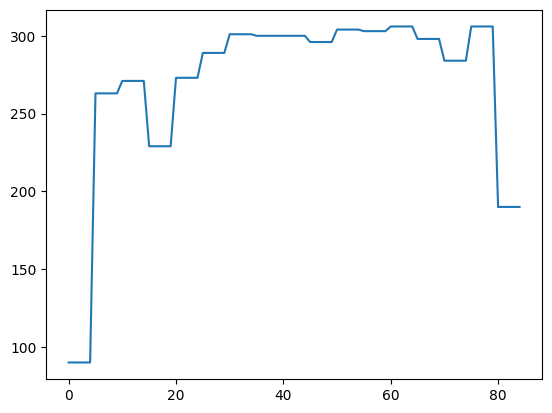

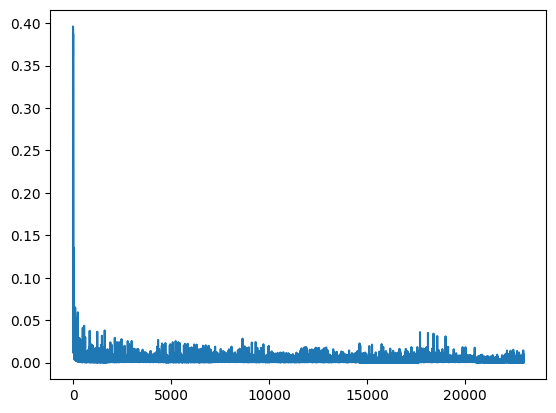

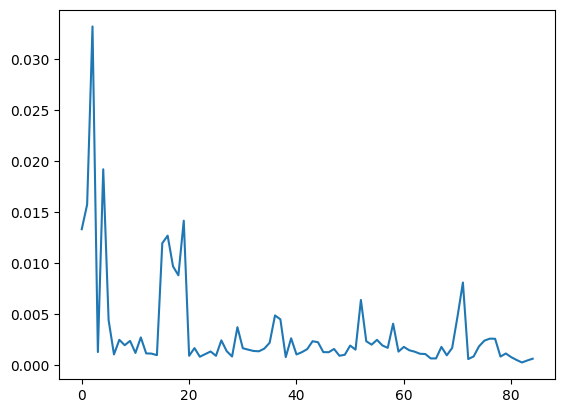

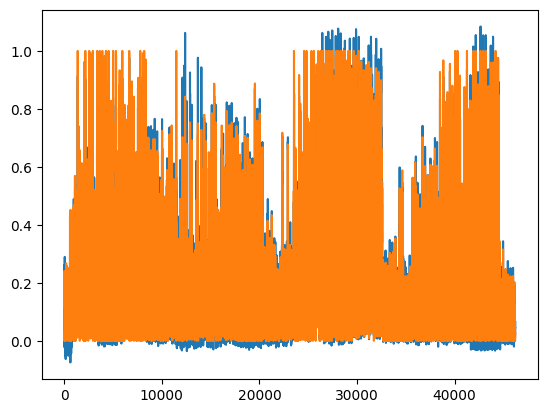

In [ ]:
plt.plot(total_data_passed)
plt.pause(0.1)
plt.plot(losses)
plt.pause(0.1)
plt.plot(val_losses)
plt.pause(0.1)
plt.plot()
plt.plot(np.concatenate(predictions).ravel())
plt.plot(np.concatenate(ground_truth).ravel())
plt.pause(0.1)

np.save(f"/content/cloud.npy", {
    "val_losses": val_losses,
    "losses": losses,
    "data_volume": total_data_passed
})
torch.save(model.state_dict(), f"/content/cloud.pth")

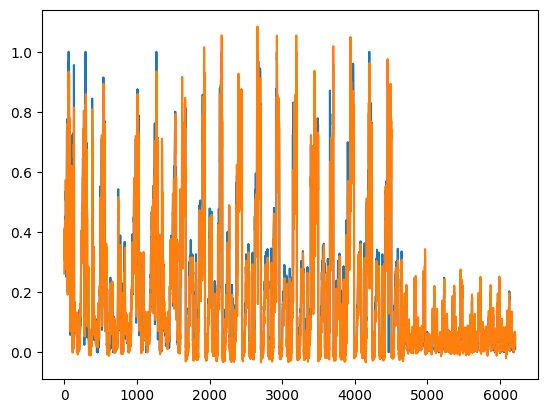

In [ ]:
plt.plot(np.concatenate(ground_truth).ravel()[40000:])
plt.plot(np.concatenate(predictions).ravel()[40000:])

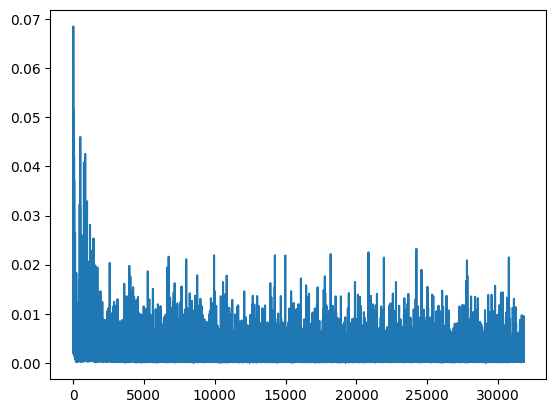

In [ ]:
plt.plot(losses)

In [ ]:
# check to make sure batch sizes are correct
index = 0
for gt, pr in zip(ground_truth, predictions):
  if gt.shape != torch.Size([batch_size]) or pr.shape != torch.Size([batch_size]):
    print(index)
  index += 1

In [ ]:
def test_model(model, loader):
  model.eval()
  preds, gt = [], []
  for X_batch, y_batch in loader:
    X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
    print(X_batch.shape)
    y_pred = model(X_batch)
    preds.append(y_pred[:,-1,0])
    gt.append(y_batch)
  preds = torch.cat(preds).detach().cpu().numpy()
  gt = torch.cat(gt).cpu().numpy()
  print(f"R2 Score: {r2_score(gt, preds)}")
  print(f"MSE: {mean_squared_error(gt, preds)}")
  print(f"RMSE: {np.sqrt(mean_squared_error(gt, preds))}")
  return preds, gt

In [ ]:
total_params = 0
for p in model.parameters():
  if p.requires_grad:
    total_params += p.numel()
print(f"Total parameters: {total_params}")

Total parameters: 1873


In [ ]:
# 30 epochs, looking ahead one hour
window1_node4_lyr1_batch8 = {
    "mse": 0.002981418976560235,
    "r2": 0.7801016779691001,
    "params": 277
}

window1_node8_lyr1_batch8 = {
    "mse": 0.002844342729076743,
    "r2": 0.7902119186457877,
    "params": 681
}

window1_node16_lyr1_batch8 = {
    "mse": 0.0029244485776871443,
    "r2": 0.7843036130841309,
    "params": 1873
}

window6_node8_lyr1_batch8 = {
    "mse": 0.0017283976776525378,
    "r2": 0.8725822795725751,
    "params": 681
}

window6_node16_lyr1_batch8 = {
    "mse": 0.0018086234340444207,
    "r2": 0.8666680065992689,
    "params": 1873
}

things to record:
* number of rounds it takes to converge / time-per-round (wall clock)
* amount of data being moved, and across what distance
* memory consumption (?)
* loss / mse over time
* actual predictions over time

## Federated Learning

In [ ]:
!pip install -q flwr[simulation] torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import flwr as fl
from flwr.common import Metrics
DEVICE = torch.device("cuda")

In [ ]:
from collections import OrderedDict
from typing import Dict, List, Optional, Tuple

def set_parameters(net, parameters: List[np.ndarray]):
    params_dict = zip(net.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=True)


def get_parameters(net) -> List[np.ndarray]:
    return [val.cpu().numpy() for _, val in net.state_dict().items()]

In [ ]:
# all_losses, all_val_losses = [], []
def train(model, trainloader, epochs):
  # global all_losses
  optimizer = torch.optim.Adam(model.parameters())
  criterion = torch.nn.MSELoss()
  predictions = []
  ground_truth = []
  losses = []
  pbar = tqdm(range(epochs))
  for epoch in pbar:
    model.train()
    total_loss = 0
    for X_batch, y_batch in trainloader:
      if len(X_batch.shape) > 3:
        X_batch = X_batch[0]
        y_batch = y_batch[0]
      X_batch = X_batch.to(DEVICE)
      y_batch = y_batch.to(DEVICE)
      y_pred = model(X_batch)
      loss = criterion(y_pred[:,-1,0], y_batch)
      optimizer.zero_grad()
      loss.backward()
      total_loss += loss.detach().cpu()
      optimizer.step()
      losses.append(loss.detach().cpu())
      pbar.set_description(f"Epoch {epoch}: mse = {loss}")
    # if epoch % 5 != 0:
    #   continue
    # model.eval()
    # test()
    # all_losses.append(losses)
    print(f"Epoch: {epoch}, Loss: {total_loss/batch_size}")

  return losses

# model = PMModel(num_nodes=8).cuda()
# n_epochs = 35
# preds, gt, lss = train(model, trainloaders[0], n_epochs)

def test(model, loader, do_plot=False):
  # global all_val_losses
  model.eval()
  preds, gt, val_losses = [], [], []
  criterion = torch.nn.MSELoss()
  total_loss = 0

  for X_batch, y_batch in loader:
    if len(X_batch.shape) > 3:
      X_batch = X_batch[0]
      y_batch = y_batch[0]
    X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)
    y_pred = model(X_batch)
    preds.append(y_pred[:,-1,0])
    gt.append(y_batch)
    loss = criterion(y_pred[:,-1,0], y_batch)
    val_losses.append(loss.detach().cpu())
    total_loss += loss

  preds = torch.cat(preds).detach().cpu().numpy()
  gt = torch.cat(gt).cpu().numpy()

  if do_plot:
    plt.plot(preds.ravel(), label="preds")
    plt.plot(gt.ravel(), label="gt")
    plt.legend()

  if np.isnan(np.sum(gt)):
    raise Exception("bad gt")
  elif np.isnan(np.sum(preds)):
    raise Exception("bad prediction")

  r2 = r2_score(gt, preds)
  mse = mean_squared_error(gt, preds)
  rmse = np.sqrt(mse)
  print(f"R2 Score: {r2}, MSE: {mse}, RMSE: {rmse}")
  return total_loss/len(preds), r2, mse, val_losses, gt, preds

### FL setup

In [ ]:
class FlowerClient(fl.client.NumPyClient):
    def __init__(self, net, trainloader, valloader):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, config):
        return get_parameters(self.net)

    def fit(self, parameters, config):
        set_parameters(self.net, parameters)
        train(self.net, self.trainloader, epochs=1)
        return get_parameters(self.net), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        set_parameters(self.net, parameters)
        loss, r2, mse, time_elapsed = test(self.net, self.valloader)
        return float(loss), len(self.valloader), {"r2": float(r2), "mse": float(mse), "time_elapsed": float(time_elapsed)}

In [ ]:
def client_fn(cid: str) -> FlowerClient:
    """Create a Flower client representing a single organization."""

    # Load model
    net = PMModel(num_nodes=8).to(DEVICE)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data
    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]

    # Create a  single Flower client representing a single organization
    return FlowerClient(net, trainloader, valloader).to_client()

def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    r2s = [num_examples * m["r2"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]

    mses = [num_examples * m["mse"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]

    # Aggregate and return custom metric (weighted average)
    return {"r2": sum(r2s) / sum(examples), "mse": sum(mses) / sum(examples)}

# The `evaluate` function will be by Flower called after every round
def evaluate(
    server_round: int,
    parameters: fl.common.NDArrays,
    config: Dict[str, fl.common.Scalar],
) -> Optional[Tuple[float, Dict[str, fl.common.Scalar]]]:
    net = PMModel(num_nodes=8).to(DEVICE)
    set_parameters(net, parameters)  # Update model with the latest parameters
    loss, r2, mse = test(net, testloader)
    print(f"Server-side evaluation loss {loss} / r2 {r2} / mse {mse}")

    if current_month == 0:
      current_year += 1
    date_cutoff = {"year":[current_year], "month":[current_month+m for m in range(1, months+1)]}
    current_month = (current_month+months) % 12

    trainloaders, valloaders, testloader = create_federated_dataset(date_cutoff=date_cutoff)
    return loss, {"r2": r2, "mse": mse}

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

current_year = 2012
current_month = 0
months = 3
total_data_passed = []

for round in range(n_rounds): # moving time frames
  print("Round", round)
  if current_month == 0:
    current_year += 1
  date_cutoff = {"year":[current_year], "month":[current_month+m for m in range(1, months+1)]}
  print(date_cutoff)
  current_month = (current_month+months) % 12

trainloaders, valloaders, testloader = create_federated_dataset(date_cutoff=date_cutoff)

# Create FedAvg strategy
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,  # Sample 100% of available clients for training
    fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
    min_fit_clients=10,  # Never sample less than 10 clients for training
    min_evaluate_clients=5,  # Never sample less than 5 clients for evaluation
    min_available_clients=10,  # Wait until all 10 clients are available,
    evaluate_metrics_aggregation_fn=weighted_average,
    initial_parameters=fl.common.ndarrays_to_parameters(get_parameters(PMModel(num_nodes=8))),
    evaluate_fn=evaluate,  # Pass the evaluation function
)

# Specify the resources each of your clients need. By default, each
# client will be allocated 1x CPU and 0x GPUs
client_resources = {"num_cpus": 1, "num_gpus": 0.0}
if DEVICE.type == "cuda":
    # here we are assigning an entire GPU for each client.
    client_resources = {"num_cpus": 1, "num_gpus": 1.0}
    # Refer to our documentation for more details about Flower Simulations
    # and how to setup these `client_resources`.

# Start simulation
history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy,
    client_resources=client_resources,
)

<IPython.core.display.Javascript object>

INFO flwr 2024-03-07 12:51:33,292 | app.py:178 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)


This model has 1 LSTM layer with 8 hidden nodes.


2024-03-07 12:51:37,703	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2024-03-07 12:51:40,743 | app.py:213 | Flower VCE: Ray initialized with resources: {'object_store_memory': 3902652825.0, 'memory': 7805305652.0, 'node:172.28.0.12': 1.0, 'GPU': 1.0, 'CPU': 2.0, 'node:__internal_head__': 1.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'object_store_memory': 3902652825.0, 'memory': 7805305652.0, 'node:172.28.0.12': 1.0, 'GPU': 1.0, 'CPU': 2.0, 'node:__internal_head__': 1.0}
INFO flwr 2024-03-07 12:51:40,749 | app.py:219 | Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO:flwr:Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO flwr 2024-03-07 12:51:40,752 | app.py:242 | Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 1.0}
INFO:flwr:Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 1.0}
INFO f

This model has 1 LSTM layer with 8 hidden nodes.
R2 Score: -1.0504358316301152
MSE: 0.02813577838242054
Server-side evaluation loss 0.0035169741604477167 / r2 -1.0504358316301152 / mse 0.02813577838242054


INFO flwr 2024-03-07 12:51:43,078 | server.py:94 | initial parameters (loss, other metrics): tensor(0.0035, device='cuda:0', grad_fn=<DivBackward0>), {'r2': -1.0504358316301152, 'mse': 0.028135778}
INFO:flwr:initial parameters (loss, other metrics): tensor(0.0035, device='cuda:0', grad_fn=<DivBackward0>), {'r2': -1.0504358316301152, 'mse': 0.028135778}
INFO flwr 2024-03-07 12:51:43,468 | server.py:104 | FL starting
INFO:flwr:FL starting
DEBUG flwr 2024-03-07 12:51:43,474 | server.py:222 | fit_round 1: strategy sampled 12 clients (out of 12)
DEBUG:flwr:fit_round 1: strategy sampled 12 clients (out of 12)
(pid=27405) 2024-03-07 12:51:43.545942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=27405) 2024-03-07 12:51:43.546036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factor

(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.2559679746627808
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.2172037363052368
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.0170224905014038
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.3573312759399414
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.2294491529464722
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.3044252395629883
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.1246417760849
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidde

DEBUG flwr 2024-03-07 12:53:19,107 | server.py:236 | fit_round 1 received 12 results and 0 failures
DEBUG:flwr:fit_round 1 received 12 results and 0 failures
WARNING flwr 2024-03-07 12:53:19,124 | fedavg.py:250 | No fit_metrics_aggregation_fn provided


This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 1.1073366403579712


INFO flwr 2024-03-07 12:53:19,790 | server.py:125 | fit progress: (1, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8552412495487727, 'mse': 0.0019863583}, 96.31570841300072)
INFO:flwr:fit progress: (1, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8552412495487727, 'mse': 0.0019863583}, 96.31570841300072)
DEBUG flwr 2024-03-07 12:53:19,795 | server.py:173 | evaluate_round 1: strategy sampled 6 clients (out of 12)
DEBUG:flwr:evaluate_round 1: strategy sampled 6 clients (out of 12)


R2 Score: 0.8552412495487727
MSE: 0.0019863583147525787
Server-side evaluation loss 0.00024829473113641143 / r2 0.8552412495487727 / mse 0.0019863583147525787
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8463756586757226
(DefaultActor pid=27405) MSE: 0.0025454172864556313
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8399876579904197
(DefaultActor pid=27405) MSE: 0.001675672479905188
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8325463602731571
(DefaultActor pid=27405) MSE: 0.0017659827135503292
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8555044136175706
(DefaultActor pid=27405) MSE: 0.001696777413599193
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.829197859384

DEBUG flwr 2024-03-07 12:53:25,445 | server.py:187 | evaluate_round 1 received 6 results and 0 failures
DEBUG:flwr:evaluate_round 1 received 6 results and 0 failures
DEBUG flwr 2024-03-07 12:53:25,448 | server.py:222 | fit_round 2: strategy sampled 12 clients (out of 12)
DEBUG:flwr:fit_round 2: strategy sampled 12 clients (out of 12)


(DefaultActor pid=27405) R2 Score: 0.852429598048874
(DefaultActor pid=27405) MSE: 0.0016010658582672477
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7561464905738831
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7606171369552612
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7688559889793396
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5995850563049316
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7368265390396118
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.6383488178253174
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid

DEBUG flwr 2024-03-07 12:54:53,988 | server.py:236 | fit_round 2 received 12 results and 0 failures
DEBUG:flwr:fit_round 2 received 12 results and 0 failures


(DefaultActor pid=27405) Epoch: 0, Loss: 0.5994157195091248
This model has 1 LSTM layer with 8 hidden nodes.


INFO flwr 2024-03-07 12:54:54,679 | server.py:125 | fit progress: (2, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8740063588210659, 'mse': 0.0017288662}, 191.20522276200063)
INFO:flwr:fit progress: (2, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8740063588210659, 'mse': 0.0017288662}, 191.20522276200063)
DEBUG flwr 2024-03-07 12:54:54,684 | server.py:173 | evaluate_round 2: strategy sampled 6 clients (out of 12)
DEBUG:flwr:evaluate_round 2: strategy sampled 6 clients (out of 12)


R2 Score: 0.8740063588210659
MSE: 0.0017288662493228912
Server-side evaluation loss 0.00021610833937302232 / r2 0.8740063588210659 / mse 0.0017288662493228912
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8669218430452084
(DefaultActor pid=27405) MSE: 0.0014438320649787784
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8716659480347334
(DefaultActor pid=27405) MSE: 0.0015069962246343493
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8480916000576917
(DefaultActor pid=27405) MSE: 0.001825707033276558
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8686937413569229
(DefaultActor pid=27405) MSE: 0.0015706209233030677
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.85531610721

DEBUG flwr 2024-03-07 12:55:01,343 | server.py:187 | evaluate_round 2 received 6 results and 0 failures
DEBUG:flwr:evaluate_round 2 received 6 results and 0 failures
DEBUG flwr 2024-03-07 12:55:01,346 | server.py:222 | fit_round 3: strategy sampled 12 clients (out of 12)
DEBUG:flwr:fit_round 3: strategy sampled 12 clients (out of 12)


(DefaultActor pid=27405) R2 Score: 0.8795049295656278
(DefaultActor pid=27405) MSE: 0.0018714203033596277
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5467503666877747
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5665534734725952
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5658075213432312
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7180194854736328
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.6707866787910461
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7008552551269531
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pi

DEBUG flwr 2024-03-07 12:56:30,055 | server.py:236 | fit_round 3 received 12 results and 0 failures
DEBUG:flwr:fit_round 3 received 12 results and 0 failures


(DefaultActor pid=27405) Epoch: 0, Loss: 0.7348436117172241
This model has 1 LSTM layer with 8 hidden nodes.


INFO flwr 2024-03-07 12:56:30,921 | server.py:125 | fit progress: (3, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8740334974774691, 'mse': 0.0017284938}, 287.4472970480001)
INFO:flwr:fit progress: (3, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8740334974774691, 'mse': 0.0017284938}, 287.4472970480001)
DEBUG flwr 2024-03-07 12:56:30,926 | server.py:173 | evaluate_round 3: strategy sampled 6 clients (out of 12)
DEBUG:flwr:evaluate_round 3: strategy sampled 6 clients (out of 12)


R2 Score: 0.8740334974774691
MSE: 0.0017284938367083669
Server-side evaluation loss 0.00021606181690003723 / r2 0.8740334974774691 / mse 0.0017284938367083669
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8793565758635402
(DefaultActor pid=27405) MSE: 0.0018737242789939046
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8693590411589159
(DefaultActor pid=27405) MSE: 0.001417389721609652
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8634989392081697
(DefaultActor pid=27405) MSE: 0.00226170034147799
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8679986273302173
(DefaultActor pid=27405) MSE: 0.001578935538418591
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.86033241477114

DEBUG flwr 2024-03-07 12:56:36,391 | server.py:187 | evaluate_round 3 received 6 results and 0 failures
DEBUG:flwr:evaluate_round 3 received 6 results and 0 failures
DEBUG flwr 2024-03-07 12:56:36,394 | server.py:222 | fit_round 4: strategy sampled 12 clients (out of 12)
DEBUG:flwr:fit_round 4: strategy sampled 12 clients (out of 12)


(DefaultActor pid=27405) R2 Score: 0.8450446324292669
(DefaultActor pid=27405) MSE: 0.0016341746086254716
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5373761653900146
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5715703368186951
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.6874952912330627
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5924273729324341
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5562340021133423
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.515851616859436
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid

DEBUG flwr 2024-03-07 12:58:04,550 | server.py:236 | fit_round 4 received 12 results and 0 failures
DEBUG:flwr:fit_round 4 received 12 results and 0 failures


This model has 1 LSTM layer with 8 hidden nodes.(DefaultActor pid=27405) Epoch: 0, Loss: 0.7163593769073486



INFO flwr 2024-03-07 12:58:05,278 | server.py:125 | fit progress: (4, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8768632856723545, 'mse': 0.0016896641}, 381.8040350280007)
INFO:flwr:fit progress: (4, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8768632856723545, 'mse': 0.0016896641}, 381.8040350280007)
DEBUG flwr 2024-03-07 12:58:05,284 | server.py:173 | evaluate_round 4: strategy sampled 6 clients (out of 12)
DEBUG:flwr:evaluate_round 4: strategy sampled 6 clients (out of 12)


R2 Score: 0.8768632856723545
MSE: 0.001689664088189602
Server-side evaluation loss 0.00021120796736795455 / r2 0.8768632856723545 / mse 0.001689664088189602
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8824076070751146
(DefaultActor pid=27405) MSE: 0.001826338586397469
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8815724877170834
(DefaultActor pid=27405) MSE: 0.0012412290088832378
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.884327796771364
(DefaultActor pid=27405) MSE: 0.0010983378160744905
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.873175613062767
(DefaultActor pid=27405) MSE: 0.0014892686158418655
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.851451132546850

DEBUG flwr 2024-03-07 12:58:10,817 | server.py:187 | evaluate_round 4 received 6 results and 0 failures
DEBUG:flwr:evaluate_round 4 received 6 results and 0 failures
DEBUG flwr 2024-03-07 12:58:10,821 | server.py:222 | fit_round 5: strategy sampled 12 clients (out of 12)
DEBUG:flwr:fit_round 5: strategy sampled 12 clients (out of 12)


(DefaultActor pid=27405) R2 Score: 0.8680060741107356
(DefaultActor pid=27405) MSE: 0.0014320685295388103
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5753346085548401
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7061206698417664
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5620604157447815
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7011234164237976
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5475192070007324
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.5344691276550293
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pi

DEBUG flwr 2024-03-07 12:59:39,231 | server.py:236 | fit_round 5 received 12 results and 0 failures
DEBUG:flwr:fit_round 5 received 12 results and 0 failures


This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) Epoch: 0, Loss: 0.7168643474578857


INFO flwr 2024-03-07 12:59:39,919 | server.py:125 | fit progress: (5, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8776385939516498, 'mse': 0.0016790251}, 476.4455454080007)
INFO:flwr:fit progress: (5, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), {'r2': 0.8776385939516498, 'mse': 0.0016790251}, 476.4455454080007)
DEBUG flwr 2024-03-07 12:59:39,927 | server.py:173 | evaluate_round 5: strategy sampled 6 clients (out of 12)
DEBUG:flwr:evaluate_round 5: strategy sampled 6 clients (out of 12)


R2 Score: 0.8776385939516498
MSE: 0.001679025124758482
Server-side evaluation loss 0.00020987812604289502 / r2 0.8776385939516498 / mse 0.001679025124758482
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8695884716929494
(DefaultActor pid=27405) MSE: 0.002160802250728011
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8776385939516498
(DefaultActor pid=27405) MSE: 0.001679025124758482
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8832344384698703
(DefaultActor pid=27405) MSE: 0.0018134969286620617
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.8737734176440468
(DefaultActor pid=27405) MSE: 0.0014822487719357014
(DefaultActor pid=27405) This model has 1 LSTM layer with 8 hidden nodes.
(DefaultActor pid=27405) R2 Score: 0.85182932171821

DEBUG flwr 2024-03-07 12:59:46,212 | server.py:187 | evaluate_round 5 received 6 results and 0 failures
DEBUG:flwr:evaluate_round 5 received 6 results and 0 failures
INFO flwr 2024-03-07 12:59:46,219 | server.py:153 | FL finished in 482.74528501000077
INFO:flwr:FL finished in 482.74528501000077
INFO flwr 2024-03-07 12:59:46,229 | app.py:226 | app_fit: losses_distributed [(1, 0.00023620199014355117), (2, 0.0002027859833712379), (3, 0.00021862719586351886), (4, 0.0001848452326764042), (5, 0.00021536761293342957)]
INFO:flwr:app_fit: losses_distributed [(1, 0.00023620199014355117), (2, 0.0002027859833712379), (3, 0.00021862719586351886), (4, 0.0001848452326764042), (5, 0.00021536761293342957)]
INFO flwr 2024-03-07 12:59:46,233 | app.py:227 | app_fit: metrics_distributed_fit {}
INFO:flwr:app_fit: metrics_distributed_fit {}
INFO flwr 2024-03-07 12:59:46,235 | app.py:228 | app_fit: metrics_distributed {'r2': [(1, 0.8426735913316574), (2, 0.8650323615452337), (3, 0.8642650384602101), (4, 0.873

(DefaultActor pid=27405) R2 Score: 0.8689997024192542
(DefaultActor pid=27405) MSE: 0.0014212882379069924


In [ ]:
history.__dict__

{'losses_distributed': [(1, 0.00023620199014355117),
  (2, 0.0002027859833712379),
  (3, 0.00021862719586351886),
  (4, 0.0001848452326764042),
  (5, 0.00021536761293342957)],
 'losses_centralized': [(0,
   tensor(0.0035, device='cuda:0', grad_fn=<DivBackward0>)),
  (1, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>)),
  (2, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>)),
  (3, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>)),
  (4, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>)),
  (5, tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>))],
 'metrics_distributed_fit': {},
 'metrics_distributed': {'r2': [(1, 0.8426735913316574),
   (2, 0.8650323615452337),
   (3, 0.8642650384602101),
   (4, 0.8734901185473193),
   (5, 0.8708439909826646)],
  'mse': [(1, 0.001889616115173946),
   (2, 0.0016222878475673497),
   (3, 0.0017490176833234727),
   (4, 0.0014787621912546456),
   (5, 0.001722941097492973)]},
 'metrics_centralized': {'r2': [(0, -1.05043583163

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


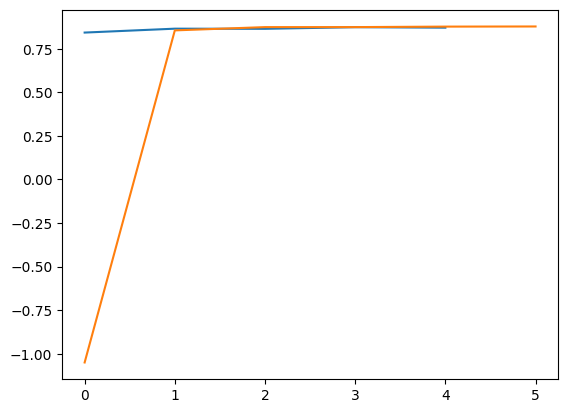

In [ ]:
plt.plot([r2[1] for r2 in history.metrics_distributed["r2"]], label="client")
plt.plot([r2[1] for r2 in history.metrics_centralized["r2"]], label="server")

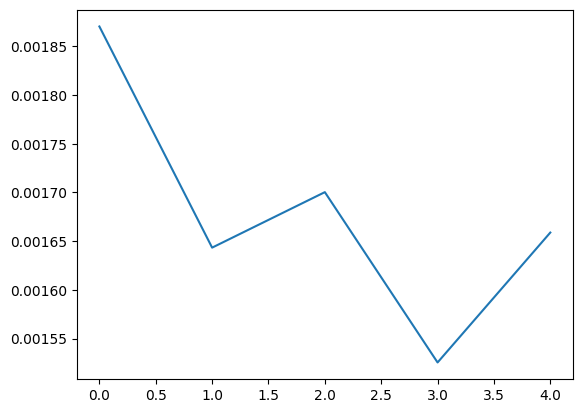

In [ ]:
plt.plot([mse[1] for mse in history.metrics_distributed["mse"]])

## FL model without flower

In [ ]:
# doi: 10.1038/s42949-022-00070-0
latlong = {
  "Aotizhongxin": (39.9858, 116.3937),
  "Changping": (40.217, 116.23),
  "Dingling": (40.292, 116.22),
  "Dongsi": (39.929, 116.417),
  "Guanyuan": (39.929, 116.339),
  "Gucheng": (39.914, 116.184),
  "Huairou": (40.328, 116.628),
  "Nongzhanguan": (39.937, 116.461),
  "Shunyi": (40.127, 116.655),
  "Tiantan": (39.886, 116.407),
  "Wanliu": (39.987, 116.287),
  "Wanshouxigong": (39.878, 116.352),
}

latlong_df = pd.DataFrame({
    "name": latlong.keys(),
    "lat": [latlong[k][0] for k in latlong],
    "long": [latlong[k][1] for k in latlong]
})

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
DEVICE="cpu"
class FLClient():
  def __init__(self, name, drop_rate=0):
    self.name = name
    self.drop_rate = drop_rate
    self.model = PMModel(num_nodes=8).to(DEVICE)
    self.losses = []
    self.val_losses = []
    self.data_passed = []
    self.wt_norms = []


class FLServer():
  def __init__(self, stations):
    self.neighbors = stations
    self.losses = []
    self.predictions = []
    self.model = PMModel(num_nodes=8).to(DEVICE)
    self.aggregate_weights = []
    self.wt_norms = []

  def add_weights(self, weight):
    self.aggregate_weights.append(weight)
    if len(self.aggregate_weights) > len(self.neighbors):
      raise Exception(f"Houston we have a problem with {len(self.aggregate_weights)}, {len(self.neighbors)}")

  def get_final_weights(self):
    if len(self.aggregate_weights) < len(self.neighbors):
      raise Exception(f"Not done gathering weights yet: {len(self.aggregate_weights)}, {len(self.neighbors)}") # forced asynchronicity
    else:
      averaged_weights = []
      for wt_index, wts in enumerate(self.aggregate_weights): # iterating per-client
        if len(averaged_weights) == 0:
          averaged_weights = wts
        else:
          for i, wt in enumerate(wts): # for layer in client
            averaged_weights[i] += wt
      averaged_weights = [avg_wt / len(self.aggregate_weights) for avg_wt in averaged_weights]
      self.aggregate_weights = []
      return averaged_weights

<IPython.core.display.Javascript object>

In [ ]:
# normal FL
def train_all_members(epochs=50, clients={}, stations=[]):
  for i, location_name in enumerate(stations):
    print(location_name)
    if location_name not in clients:
      client = FLClient(location_name)
    else:
      client = clients[location_name]

    losses = train(client.model, trainloaders[i], epochs)
    _, _, _, val_losses, _, _ = test(client.model, valloaders[i])
    client.losses.append(losses)
    client.val_losses.append(val_losses)
    client.data_passed.append(len(trainloaders[i]))
    clients[location_name] = client
    wts = get_parameters(client.model)
    client.wt_norms.append([np.linalg.norm(wt) for wt in wts])
  return clients

def avg_centralized(trained_clients_dict, server):
  for client_name in trained_clients_dict:
    client_wt = get_parameters(trained_clients_dict[client_name].model)
    server.add_weights(client_wt)

    # update weights
  set_parameters(server.model, server.get_final_weights())
  _, _, _, losses, _, preds = test(server.model, testloader)
  server.losses.append(losses)
  server.predictions.append(preds)

  wts = get_parameters(server.model)
  server.wt_norms.append([np.linalg.norm(wt) for wt in wts])

  return trained_clients_dict, server

def set_client_weights(trained_clients_dict, server):
  server_wts = get_parameters(server.model)
  for client_name in trained_clients_dict:
    client = trained_clients_dict[client_name]
    set_parameters(client.model, server_wts)
    trained_clients_dict[client_name] = client
  return trained_clients_dict

In [ ]:
DEVICE = "cuda"
batch_size = 64
current_year = 2012
current_month = 0
months = 3
total_data_passed = []
n_rounds = 20
n_epochs = 5
test_stations = sorted(latlong.keys())
server = FLServer(test_stations)
trained_clients = {}

for r in range(n_rounds):
  print("Round", r)
  if current_month == 0:
    current_year += 1
  date_cutoff = {"year":[current_year], "month":[current_month+m for m in range(1, months+1)]}
  current_month = (current_month+months) % 12
  # date_cutoff = None

  trainloaders, valloaders, testloader = create_federated_dataset(date_cutoff=date_cutoff)
  clear_output()
  if len(trainloaders) == 0 or len(valloaders) == 0 or len(testloader) == 0:
    print("out of data")
    continue

  trained_clients = train_all_members(n_epochs, trained_clients, test_stations)
  trained_clients, server = avg_centralized(trained_clients, server)
  trained_clients = set_client_weights(trained_clients, server)

out of data


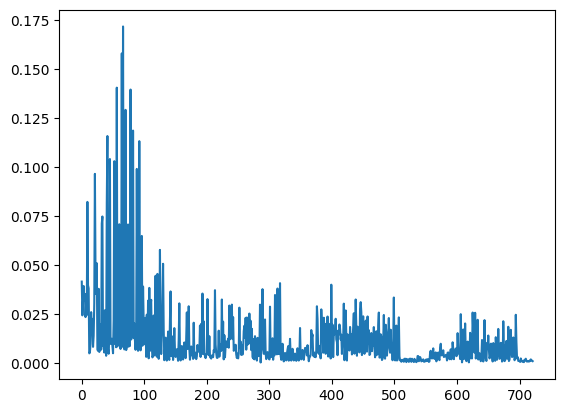

In [ ]:
plt.plot(np.concatenate(server.losses).ravel())

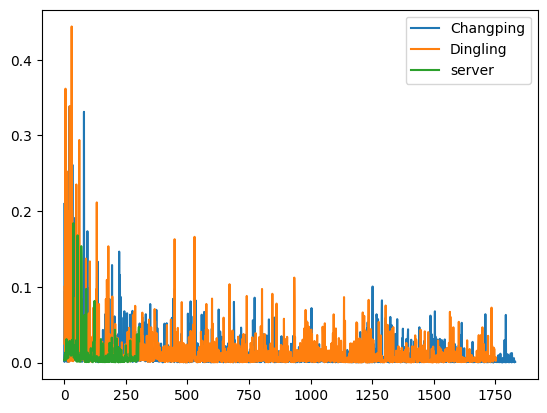

In [ ]:
for client_nme in trained_clients:
  client = trained_clients[client_nme]
  plt.plot(np.concatenate(client.losses).ravel(), label=client_nme)
# plt.plot(np.concatenate(server.losses).ravel(), label="server")
plt.legend()

In [ ]:
gt = []
preds = []
date_cutoff = {"year":[2017], "month":[1,2,3]}
_, _, testloader = create_federated_dataset(date_cutoff=date_cutoff)
clear_output()

for X_batch, y_batch in testloader:
  gt.append(y_batch[0])
  y_pred = server.model(X_batch[0].cuda())
  preds.append(y_pred[:, -1, 0].detach().cpu())
gt = np.concatenate(gt).ravel()
preds = np.concatenate(preds).ravel()

0.533222113442301
0.0013049551


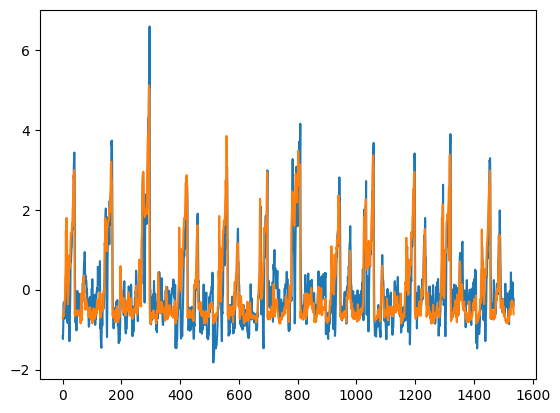

In [ ]:
plt.plot((preds-np.mean(preds))/np.std(preds))
plt.plot((gt-np.mean(gt))/np.std(gt))
print(r2_score(gt, preds))
print(((preds-gt)**2).mean())

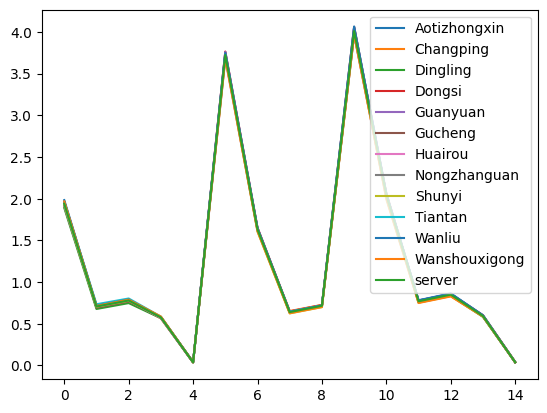

In [ ]:
norms = []
for client_name in trained_clients:
  client = trained_clients[client_name]
  plt.plot(np.concatenate(client.wt_norms).ravel()[-15:], label=client_name)
  norms.append(np.concatenate(client.wt_norms).ravel())

plt.plot(np.concatenate(server.wt_norms).ravel()[-15:], label="server")
plt.legend()

In [ ]:
os.chdir("/content")
for client_name in trained_clients:
  client = trained_clients[client_name]
  np.save(f"{client_name}_flcent.npy", {
    "val_losses": client.val_losses,
    "losses": client.losses,
    "data_volume": client.data_passed
    "norms": client.wt_norms
  })
  torch.save(client.model.state_dict(), f"{client_name}_flcent.pth")

In [ ]:
np.save("server_flcent.npy", {
    "losses": server.losses,
    # "data_volume": server.data_passed
    "norms": server.wt_norms
})
torch.save(server.model.state_dict(), "server_flcent.pth")

In [ ]:

# !mv *_flcent.* fl_clients
# !zip -r fl_clients.zip fl_clients

## P2P Model
* Construct graph of geographic relationships (weighted?)
* at each round:
  * Do computation/training locally
  * after everyone is done (asynchronous), each model gets assigned the average of its one-hop neighbors [or some other metric of neighbors]
  *  rinse, repeat
* Will need to calculate

In [9]:
# doi: 10.1038/s42949-022-00070-0
latlong = {
  "Aotizhongxin": (39.9858, 116.3937),
  "Changping": (40.217, 116.23),
  "Dingling": (40.292, 116.22),
  "Dongsi": (39.929, 116.417),
  "Guanyuan": (39.929, 116.339),
  "Gucheng": (39.914, 116.184),
  "Huairou": (40.328, 116.628),
  "Nongzhanguan": (39.937, 116.461),
  "Shunyi": (40.127, 116.655),
  "Tiantan": (39.886, 116.407),
  "Wanliu": (39.987, 116.287),
  "Wanshouxigong": (39.878, 116.352),
}

latlong_df = pd.DataFrame({
    "name": latlong.keys(),
    "lat": [latlong[k][0] for k in latlong],
    "long": [latlong[k][1] for k in latlong]
})

In [10]:
import geopy.distance
k = 8

knns = {}
distance_matrix = []
for start_key in latlong:
  distance_matrix_row = []
  for dest_key in latlong:
    distance_matrix_row.append(geopy.distance.distance(latlong[start_key], latlong[dest_key]).km)
  _, sorted_idxs = zip(*sorted(zip(distance_matrix_row, latlong.keys()), key=lambda x: x[0]))

  knns[start_key] = []
  for i in range(k+1):
    knns[start_key].append(sorted_idxs[i])

  distance_matrix.append(np.array(distance_matrix_row))
distance_matrix = np.array(distance_matrix)


<Axes: >

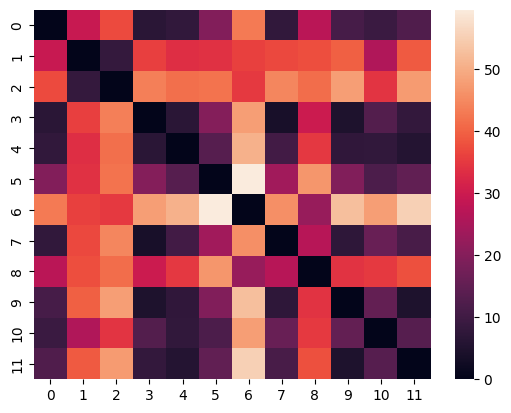

In [ ]:
sns.heatmap(distance_matrix)

In [ ]:
# threshold-based for lower traffic burden
# k-based for better guarantee of neighbors. try both
# compare traffic movement distance to theoretical core in Beijing (random AWS cluster location?)

class P2PClient():
  def __init__(self, name, knns, drop_rate=0):
    self.name = name
    self.neighbors = knns
    self.aggregate_weights = []
    self.drop_rate = drop_rate
    self.model = PMModel(num_nodes=8).to(DEVICE)
    self.data_passed = []
    self.predictions = []
    self.losses = []
    self.wt_norms = []

  def add_weights(self, weight):
    self.aggregate_weights.append(weight)
    if len(self.aggregate_weights) > len(self.neighbors):
      raise Exception(f"Houston we have a problem with {self.name}, {len(self.aggregate_weights)}, {len(self.neighbors)}")

  def get_final_weights(self):
    if len(self.aggregate_weights) < len(self.neighbors):
      raise Exception("Not done gathering weights yet") # forced asynchronicity
    else:
      averaged_weights = []
      for wt_index in range(len(self.aggregate_weights[0])):
        averaged_weights.append(np.mean([wt[wt_index] for wt in self.aggregate_weights], axis=0))
      self.aggregate_weights = []
      return averaged_weights

# kNN
# train a round, pass weights to nearest neighbors, fedavg at each neighbor

def train_all_members(epochs=50, clients={}):
  for i, location_name in enumerate(latlong):
    print(location_name)
    if location_name not in clients:
      client = P2PClient(location_name, knns[location_name])
    else:
      client = clients[location_name]

    losses = train(client.model, trainloaders[i], epochs)
    client.data_passed.append(len(trainloaders[i]))
    clients[location_name] = client
  return clients

def avg_all_members(trained_clients_dict):
  client_index = 0

  for client_name in trained_clients_dict:

    client = trained_clients_dict[client_name]
    for neighbor in client.neighbors:
      nbr_wt = get_parameters(trained_clients_dict[neighbor].model)
      client.add_weights(nbr_wt)

    # update weights
    wts = client.get_final_weights()
    set_parameters(client.model, wts)
    loss, r2, mse, losses, _, preds = test(client.model, trainloaders[client_index])
    client.predictions.append(preds)
    client.losses.append(losses)
    client.wt_norms.append([np.linalg.norm(wt) for wt in wts])
    print(f"Client {client_name}: loss {loss}, r2 {r2}, mse {mse}")
    client_index += 1
  return trained_clients_dict


In [ ]:
DEVICE = "cpu"
batch_size = 64
current_year = 2012
current_month = 0
months = 3
total_data_passed = []
n_rounds = 20
n_epochs = 5
trained_clients = {}

for r in range(n_rounds):
  print("Round", r)
  if current_month == 0:
    current_year += 1
  date_cutoff = {"year":[current_year], "month":[current_month+m for m in range(1, months+1)]}
  current_month = (current_month+months) % 12
  # date_cutoff = None

  trainloaders, valloaders, testloader = create_federated_dataset(date_cutoff=date_cutoff)
  clear_output()
  if len(trainloaders) == 0 or len(valloaders) == 0 or len(testloader) == 0:
    print("out of data")
    continue

  trained_clients = train_all_members(n_epochs, trained_clients)
  trained_clients = avg_all_members(trained_clients)

out of data


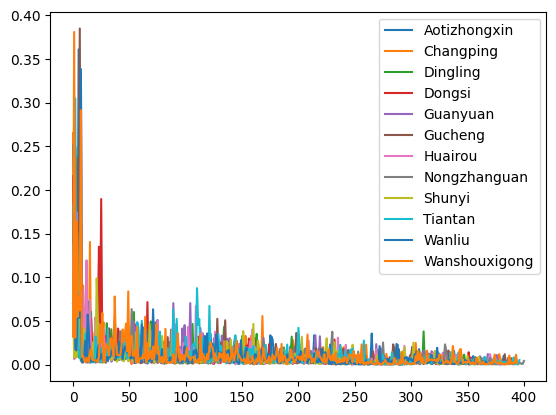

In [ ]:
for client_name in trained_clients:
  client = trained_clients[client_name]
  plt.plot(np.concatenate(client.losses).ravel(), label=client_name)
plt.legend()

In [ ]:
os.chdir("/content")
for client_name in trained_clients:
  client = trained_clients[client_name]
  np.save(f"{client_name}_flp2p.npy", {
    "losses": client.losses,
    "data_volume": client.data_passed,
    "norms": client.wt_norms
  })
  torch.save(client.model.state_dict(), f"{client_name}_flp2p.pth")

In [ ]:
!mv *_flp2p.* p2p_8_fl
!zip -r p2p_8_fl.zip p2p_8_fl

  adding: p2p_8_fl/ (stored 0%)
  adding: p2p_8_fl/Guanyuan_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Guanyuan_flp2p.npy (deflated 79%)
  adding: p2p_8_fl/Shunyi_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Gucheng_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Huairou_flp2p.npy (deflated 79%)
  adding: p2p_8_fl/Dongsi_flp2p.npy (deflated 82%)
  adding: p2p_8_fl/Dingling_flp2p.npy (deflated 76%)
  adding: p2p_8_fl/Wanliu_flp2p.npy (deflated 79%)
  adding: p2p_8_fl/Changping_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Dingling_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Huairou_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Nongzhanguan_flp2p.pth (deflated 33%)
  adding: p2p_8_fl/Changping_flp2p.npy (deflated 82%)
  adding: p2p_8_fl/Tiantan_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Aotizhongxin_flp2p.pth (deflated 33%)
  adding: p2p_8_fl/Nongzhanguan_flp2p.npy (deflated 82%)
  adding: p2p_8_fl/Wanliu_flp2p.pth (deflated 32%)
  adding: p2p_8_fl/Wanshouxigong_flp2p.pth (deflated 33%)
  addin

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


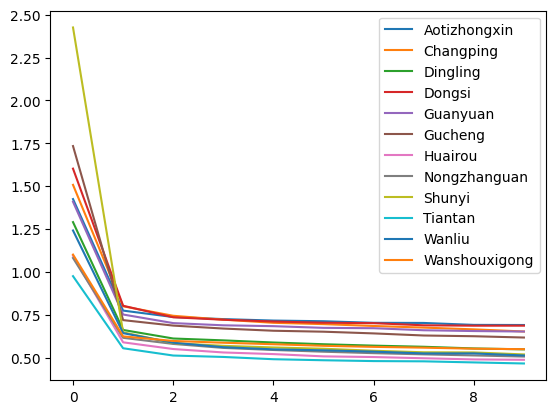

In [ ]:
for t in train_loss:
  plt.plot(train_loss[t][0], label=t)
plt.legend()

## Traffic calculations

In [56]:
# calculate downlink traffic
model = PMModel(8)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params*32, "bits upload/download") # 32 bit floats

This model has 1 LSTM layer with 8 hidden nodes.
40224 bits upload/download


In [ ]:
# time one round on CPU vs on GPU
# cpu
DEVICE = "cpu"


Final Loss: 0.056954942643642426
Aotizhongxin 31815
Changping 32681
Dingling 31306
Dongsi 30338
Guanyuan 32263
Gucheng 32504
Huairou 31708
Nongzhanguan 33114
Shunyi 30194
Tiantan 32843
Wanliu 30634
Wanshouxigong 32768
Total traffic: 26842112 bytes


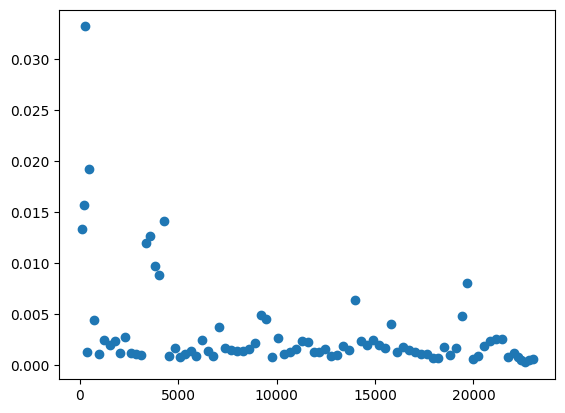

In [61]:
# calculate total data passed for cloud model
"""
Assumption: pass the data to the central model as it comes in, data is stored centrally. What matters is the amount of
data total so just len(trainloaders) for the entire dataset.

downlink data is none, as there is no re-sending of the model.
"""
rounds = 17
epochs = 5
batch_size = 64

cloud_data = np.load(f"/content/cloud.npy", allow_pickle=True)[()]
plt.scatter(np.cumsum(cloud_data["data_volume"]), cloud_data["val_losses"])
print(f"Final Loss: {np.sqrt(np.mean(cloud_data['val_losses'][-1000:]))}")

# 11 features, 32-bit per feature
trainloader, _, _ = create_unified_dataset()
bits_per_row = 11*32
uplink = bits_per_row * len(trainloader) * batch_size
print(f"Total traffic: {uplink // 4} bytes")

In [7]:
!unzip /content/local_shuffled_dropped.zip
clear_output()
datums = [np.load(f"/content/local_shuffled_dropped/{str(i)}_local.npy", allow_pickle=True)[()] for i in range(12)]

In [19]:
plt.cm.tab20(1)

(0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0)

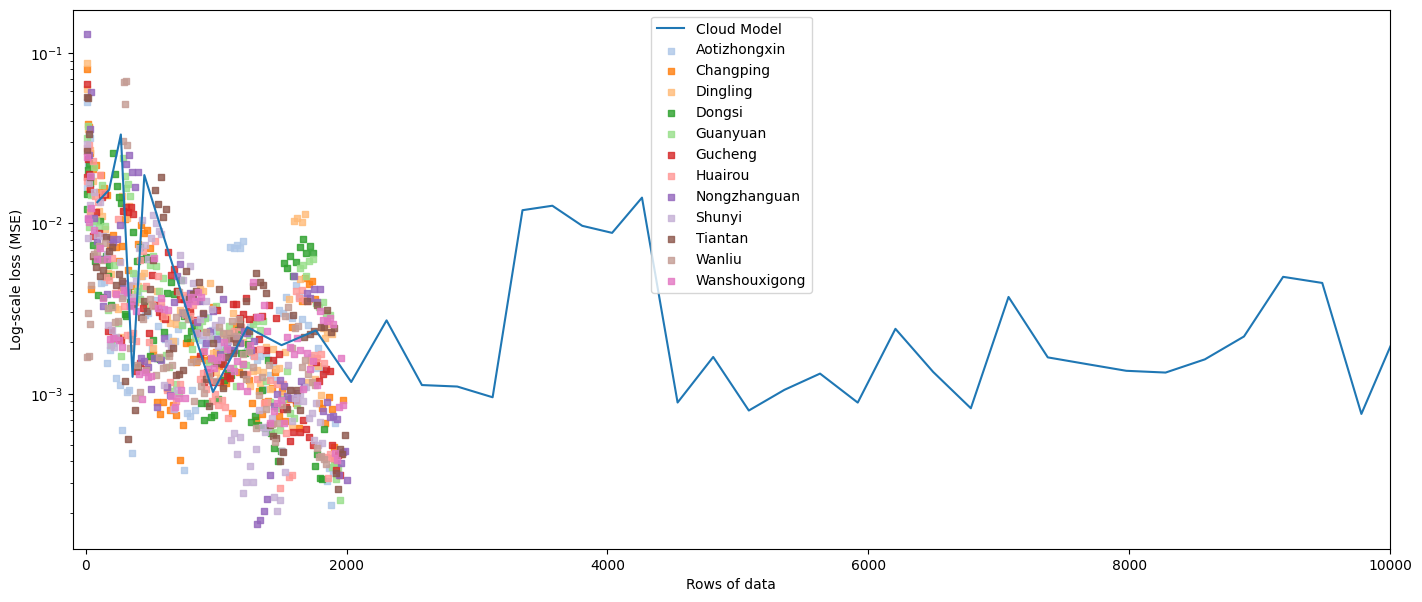

In [27]:
plt.figure(figsize=(17, 7))

plt.plot(np.cumsum(cloud_data["data_volume"]), cloud_data["val_losses"], label="Cloud Model", color=plt.cm.tab20(0))
for i in range(12):
  dats = datums[i]
  plt.scatter(np.cumsum(dats["data_volume"]), dats["val_losses"], marker=",", s=plt.rcParams['lines.markersize'] ** 1.5, alpha=0.8, label=list(latlong.keys())[i], color=plt.cm.tab20(i+1))
plt.xlabel("Rows of data")
plt.ylabel("Log-scale loss (MSE)")
plt.legend()
plt.xlim((-100, 10000))
plt.yscale("log")

In [ ]:
# my benchmark: the same amount of data (retraining, etc.) over the same amount of time => more accurate measure
# energy calculation

In [32]:
!unzip /content/fl_clients.zip
clear_output()

In [53]:
len(cloud_data["val_losses"])
# for x in server_data["losses"]:
#   print(len(x))

85

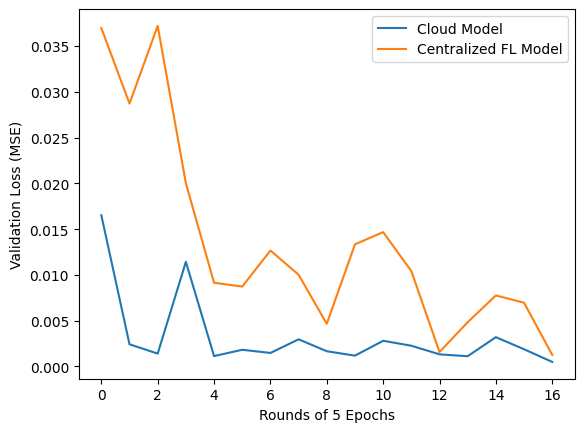

In [85]:
# federated learning (centralized) — losses versus cloud model
# plot loss at central
# server_data = np.load(f"/content/fl_clients/server_flcent.npy", allow_pickle=True)[()]
# plt.plot(np.concatenate(server_data["losses"]).ravel())
plt.plot([np.mean(cloud_data["val_losses"][i:i+5]) for i in range(0,85,5)], label="Cloud Model")
plt.plot([np.mean(x) for x in server_data["losses"]], label="Centralized FL Model")
plt.ylabel("Validation Loss (MSE)")
plt.xlabel("Rounds of 5 Epochs")
plt.legend()

# print(f"Final Loss: {np.sqrt(np.mean(np.concatenate(server_data['losses']).ravel()[-100:]))}")

In [64]:
fl_datums = []
for station_name in latlong:
  dats = np.load(f"/content/fl_clients/{station_name}_flcent.npy", allow_pickle=True)[()]
  fl_datums.append(dats)

Text(0, 0.5, 'Log-scale Validation Loss (MSE)')

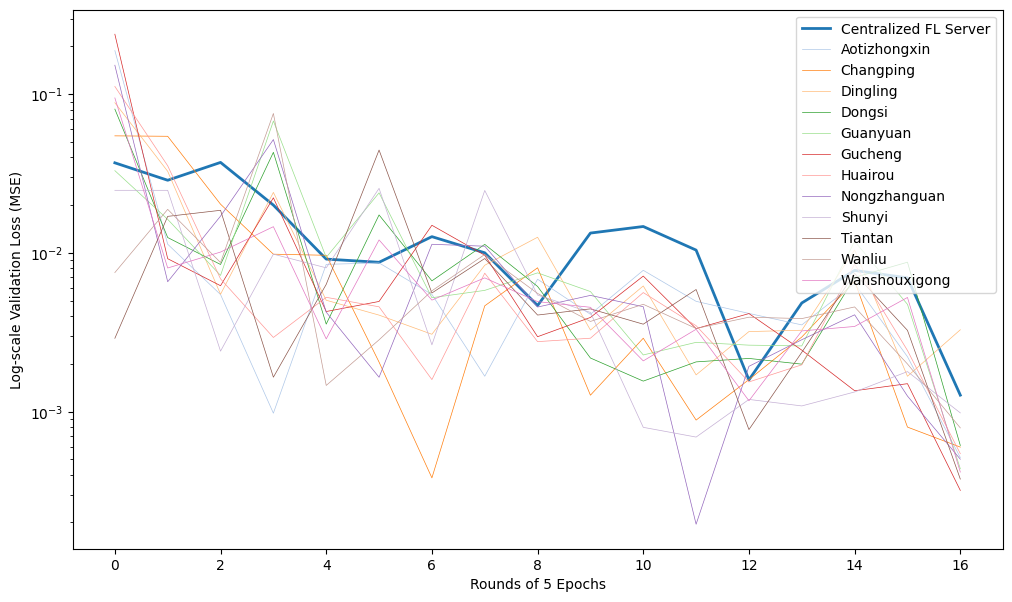

In [114]:
plt.figure(figsize=(12, 7))
plt.plot([np.mean(x) for x in server_data["losses"]], label="Centralized FL Server", linewidth=2, color=plt.cm.tab20(0))
for i in range(len(fl_datums)):
  plt.plot(fl_datums[i]["val_losses"], label=list(latlong.keys())[i], linewidth=0.5, color=plt.cm.tab20(i+1))
plt.legend(loc="upper right")
plt.yscale("log")
plt.xlabel("Rounds of 5 Epochs")
plt.ylabel("Log-scale Validation Loss (MSE)")

In [95]:
# calculate total backhaul traffic for FL model
batch_size = 64
n_rounds = 17 # tried for 20, ran out of data
n_epochs = 5
model_size = 40224 # in bits
NUM_CLIENTS = 12

# has to be uploaded from each client, then downloaded [FOR EACH ROUND]
total_fl_traffic = (model_size * 2) * NUM_CLIENTS * n_rounds
print(total_fl_traffic, "bits for FL")
print(uplink, 'bits for Cloud')

16411392 bits for FL
107368448 bits for Cloud


In [84]:
# federated learning vs p2p
# !unzip p2p_4_fl.zip
# clear_output()
p2p4_datums = []
for station_name in latlong:
  dats = np.load(f"/content/p2p_fl/{station_name}_flp2p.npy", allow_pickle=True)[()]
  p2p4_datums.append(dats)

In [92]:
len(p2p4_datums[0]["losses"])

17

Text(0, 0.5, 'Log-scale Validation Loss (MSE)')

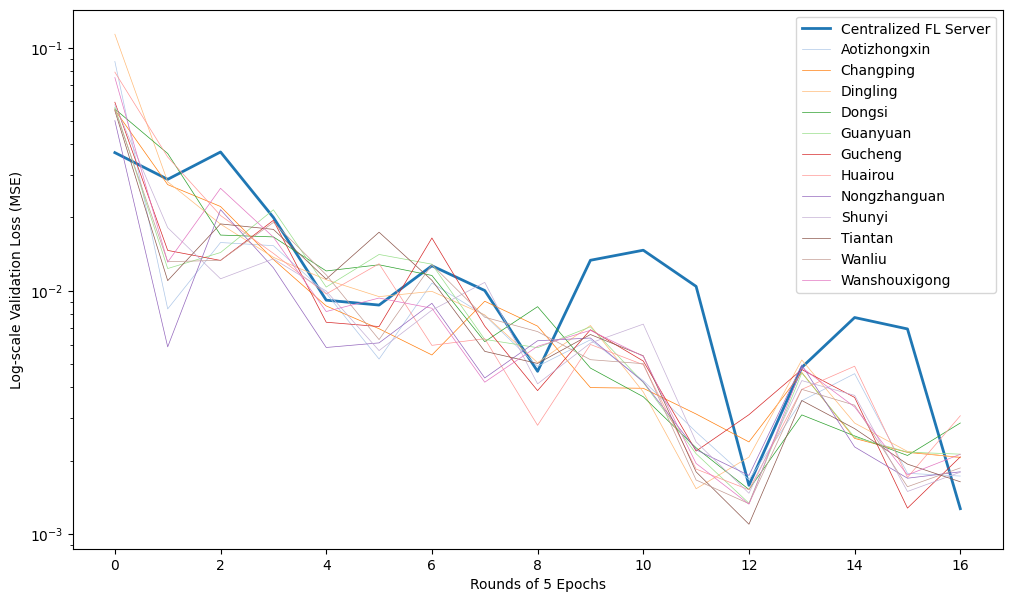

In [115]:
plt.figure(figsize=(12, 7))
plt.plot([np.mean(x) for x in server_data["losses"]], label="Centralized FL Server", linewidth=2, color=plt.cm.tab20(0))
for i in range(len(p2p4_datums)):
  plt.plot([np.mean(x) for x in p2p4_datums[i]["losses"]], label=list(latlong.keys())[i], linewidth=0.5, color=plt.cm.tab20(i+1))
plt.legend(loc="upper right")
plt.yscale("log")
plt.xlabel("Rounds of 5 Epochs")
plt.ylabel("Log-scale Validation Loss (MSE)")

In [128]:
# X2 traffic calculation
n_rounds = 17
print(model_size, "bits for a 32-bit model")
k=4

# at each round, each client gets weights from 4 others
# n_rounds * [k neighbors * clients * model size]
p2p4_traffic = n_rounds * k * NUM_CLIENTS * model_size
print(p2p4_traffic, " bits of p2p X2 traffic")
print(total_fl_traffic, "bits for FL")
print(uplink, 'bits for Cloud')

40224 bits for a 32-bit model
32822784  bits of p2p X2 traffic
16411392 bits for FL
107368448 bits for Cloud


In [129]:
k=8
p2p8_traffic = n_rounds * k * NUM_CLIENTS * model_size
print(p2p8_traffic, " bits of p2p 8 X2 traffic")

65645568  bits of p2p 8 X2 traffic


In [99]:
# from VAIS paper. Here, assume CPU = GPU power consumption per second (might be wrong)
def calculate_energy_used(traffic, comp_time_per_round):
  alpha = 3 * 10**(-3)
  beta = 0.1 * 10**(-3)

  kb = traffic * (1/8) * (1/1000)  # bits to kB: bits * 1byte/8bits * 1kb/1000bytes
  return alpha*comp_time_per_round * n_rounds + beta * kb

In [ ]:
# memory consumed: about the same
"""
Cloud: 3 months of memory per client, stored centrally
Cent FL: 3 months of memory per client, stored per-client
P2P FL: 3 months of memory per client, stored per-client
"""

In [105]:
# federated learning vs p2p
# !unzip p2p_8_fl.zip
# clear_output()
p2p8_datums = []
for station_name in latlong:
  dats = np.load(f"/content/p2p_8_fl/{station_name}_flp2p.npy", allow_pickle=True)[()]
  p2p8_datums.append(dats)

In [123]:
np.mean(datums[0]["val_losses"][-17:])

0.0018947591

In [124]:
p2p8_loss = []
p2p4_loss = []
fl_loss = []
c_loss = []
for i in range(12):
  # print(list(latlong.keys())[i])
  c_loss.append(np.mean(datums[i]["val_losses"][-17:]))
  fl_loss.append(np.mean(fl_datums[i]["losses"][-1]))
  p2p8_loss.append(np.mean(p2p8_datums[i]["losses"][-1]))
  p2p4_loss.append(np.mean(p2p4_datums[i]["losses"][-1]))

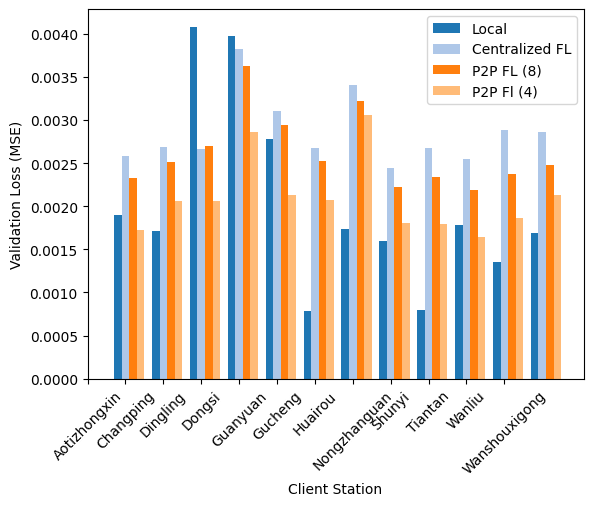

In [127]:
# go through each client model (centr vs p2p) and check the performance on their specific test dataset
plt.bar([i-0.2 for i in range(1,13)], c_loss, label="Local", width=0.2, color=plt.cm.tab20(0))
plt.bar([i for i in range(1,13)], fl_loss, label="Centralized FL", width=0.2,color=plt.cm.tab20(1))
plt.bar([i+0.2 for i in range(1,13)], p2p8_loss, label="P2P FL (8)", width=0.2, color=plt.cm.tab20(2))
plt.bar([i+0.4 for i in range(1,13)], p2p4_loss, label="P2P Fl (4)", width=0.2, color=plt.cm.tab20(3))

plt.xticks(ticks=range(12), labels=latlong.keys(), rotation=45)
plt.xlabel("Client Station")
plt.ylabel("Validation Loss (MSE)")
plt.legend()

32822784  bits of p2p X2 traffic
16411392 bits for FL
107368448 bits for Cloud


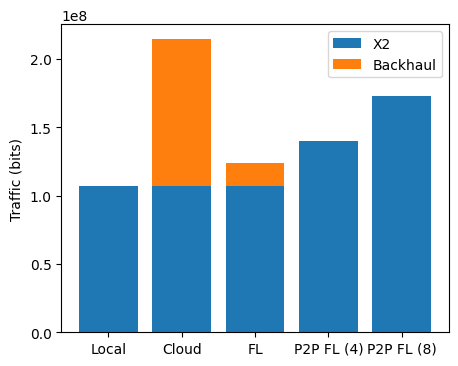

In [3]:
# plot network traffic
# X2 traffic on the bottom, backhaul traffic on top
uplink = 107368448
p2p4_traffic = 32822784
total_fl_traffic = 16411392
p2p8_traffic = 65645568

plt.figure(figsize=(5, 4))
print(p2p4_traffic, " bits of p2p X2 traffic")
print(total_fl_traffic, "bits for FL")
print(uplink, 'bits for Cloud')
plt.bar(range(5), [uplink, uplink, uplink, uplink+p2p4_traffic, uplink+p2p8_traffic], label="X2")
plt.bar(range(5), [0, uplink, total_fl_traffic, 0, 0], bottom=[uplink, uplink, uplink, uplink+p2p4_traffic, uplink+p2p8_traffic], label="Backhaul")
plt.xticks(ticks=range(5), labels=["Local", "Cloud", "FL", "P2P FL (4)", "P2P FL (8)"])
plt.ylabel("Traffic (bits)")
plt.legend()

## Miscellaneous Plotting

In [ ]:
!pip install chart_studio --q
import chart_studio.plotly as py
import plotly.tools as tl
import plotly.graph_objs as go
import pandas as pd

# Change API key for Plotly

tl.set_credentials_file(username='aschrock', api_key='CWwy1WgujKrPK4Z1J0Oh')

# Add Mapbox access token here

mapbox_access_token = 'pk.eyJ1IjoiY3hkMDAiLCJhIjoiY2x0dzhyMmIwMDRodjJsbjBhaW1wbDNuZCJ9.g66V7ZojJRe1jRUHuB55ig'

# Save latitude and longitude as variables. In this dataset, the X column is longitude and the Y column is latitude.

site_lat = latlong_df.lat
site_lon = latlong_df.long
locations_name = latlong_df.name

# Generate the data for the map

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.8
        ),
        hoverinfo='none'
    )]


# Generate a layout around Los Angeles, zoomed in so we can see the data points

layout = go.Layout(
    title='Beijing PM2.5 Monitoring Sites',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        pitch=0,
        zoom=10,
        style='light'
    ),
)

# Generate the figure using the iplot function

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Beijing PM2.5 Monitoring Sites')

AttributeError: module 'plotly.tools' has no attribute 'set_credentials_file'